# loading the classes 

In [1]:
import sys
sys.path.append('..')

from my_package.data_cleaning import *
from my_package.modeling import *
from my_package.preprocessing import *
from my_package.nn_modeling import *

# Splitting the data

In [2]:
def split_data(df,criteria='random'):
    X = df.drop(['fraud_bool'], axis=1)
    y = df['fraud_bool']
    if criteria=='paper':

        # Train test split by 'month', month 0-5 are train, 6-7 are test data as proposed in the paper
        X_train = X[X['month']<6]
        X_test = X[X['month']>=6]
        y_train = y[X['month']<6]
        y_test = y[X['month']>=6]


    elif criteria=='random':
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    elif criteria=='stratify':

        X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.2, random_state=42) 

    X_train.drop('month', axis=1, inplace=True)
    X_test.drop('month', axis=1, inplace=True)
    return X_train, X_test, y_train, y_test

# reading the data

In [4]:
# reading the base csv file using the custom class
df=data_cleaning('Base.csv')

In [5]:
df.data.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,month
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,AA,769,...,24,0,500.0,0,INTERNET,3.888115,windows,0,1,7
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,AB,366,...,15,0,1500.0,0,INTERNET,31.798819,windows,0,1,7
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,AC,870,...,-1,0,200.0,0,INTERNET,4.728705,other,0,1,7
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,AB,810,...,31,1,200.0,0,INTERNET,2.047904,linux,0,1,7
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,AB,890,...,31,0,1500.0,0,INTERNET,3.775225,macintosh,1,1,7


### data validity:

In [6]:
df.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 31 columns):
 #   Column                            Non-Null Count    Dtype   
---  ------                            --------------    -----   
 0   fraud_bool                        1000000 non-null  category
 1   income                            1000000 non-null  category
 2   name_email_similarity             1000000 non-null  float64 
 3   prev_address_months_count         1000000 non-null  int64   
 4   current_address_months_count      1000000 non-null  int64   
 5   customer_age                      1000000 non-null  category
 6   days_since_request                1000000 non-null  float64 
 7   intended_balcon_amount            1000000 non-null  float64 
 8   payment_type                      1000000 non-null  object  
 9   zip_count_4w                      1000000 non-null  int64   
 10  velocity_6h                       1000000 non-null  float64 
 11  velocity_24h             

- in the data cleaning class ,we have reformated the columns to there suitable data type and deleted the device_fraud_count column as it was constant for all the records.
- we changed the age and income to category as both of them have set of 10 values only.
- and reformat the categorical columns to category to save memory also.

In [7]:
# check the number of duplicates using the custom class
df.check_duplicates()

'this data has no duplicates'

In [8]:
# describe the numerical features:
df.describe(flag='numerical')

,name_email_similarity,prev_address_months_count,current_address_months_count,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,bank_months_count,proposed_credit_limit,session_length_in_minutes,month
count,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,0.493694,16.718568,86.587867,1.025705e+00,8.661499,1572.692049,5665.296605,4769.781965,4856.324016,184.361849,9.503544,130.989595,10.839303,515.851010,7.544940,3.288674
std,0.289125,44.046230,88.406599,5.381835e+00,20.236155,1005.374565,3009.380665,1479.212612,919.843934,459.625329,5.033792,69.681812,12.116875,487.559902,8.033106,2.209994
min,0.000001,-1.000000,-1.000000,4.036860e-09,-15.530555,1.000000,-170.603072,1300.307314,2825.748405,0.000000,0.000000,-170.000000,-1.000000,190.000000,-1.000000,0.000000
1%,0.021672,-1.000000,0.000000,2.825563e-04,-1.831266,248.000000,695.593750,2021.407710,3059.832982,0.000000,1.000000,-14.000000,-1.000000,200.000000,0.651256,0.000000
25%,0.225216,-1.000000,19.000000,7.193246e-03,-1.181488,894.000000,3436.365848,3593.179135,4268.368423,1.000000,6.000000,83.000000,-1.000000,200.000000,3.103053,1.000000
50%,0.492153,-1.000000,52.000000,1.517574e-02,-0.830507,1263.000000,5319.769349,4749.921161,4913.436941,9.000000,9.000000,122.000000,5.000000,200.000000,5.114321,3.000000
75%,0.755567,12.000000,130.000000,2.633069e-02,4.984176,1944.000000,7680.717827,5752.574191,5488.083356,25.000000,13.000000,178.000000,25.000000,500.000000,8.866131,5.000000
99%,0.997470,231.000000,370.000000,2.199567e+01,100.826524,4970.000000,13932.187847,8597.047788,6779.328391,1974.000000,23.000000,305.000000,31.000000,1500.000000,44.552828,7.000000
max,0.999999,383.000000,428.000000,7.845690e+01,112.956928,6700.000000,16715.565404,9506.896596,6994.764201,2385.000000,39.000000,389.000000,32.000000,2100.000000,85.899143,7.000000


### findings from this step:
- the prev_address_month contain missing data with -ve flag we have created a function to replace the -ve values with nan according to the datasheet.
- also the current address month count have missing values and possible outliers.
- there are many columns with outliers: intended_balcon,zip_count,velocity,data_of_birth_distinct_email,proposed_credit limit and session length in minutes.

In [9]:
df.describe(flag='categorical')

,fraud_bool,income,customer_age,payment_type,employment_status,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,has_other_cards,foreign_request,source,device_os,keep_alive_session,device_distinct_emails_8w
count,1000000,1000000.0,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000,1000000
unique,2,9.0,9,5,7,2,7,2,2,2,2,2,5,2,4
top,0,0.9,30,AB,CA,1,BC,0,1,0,0,INTERNET,other,1,1
freq,988971,221419.0,311433,370554,730252,529886,372143,582923,889676,777012,974758,992952,342728,576947,968067


# check the nulls:

In [10]:
columns_with_nulls=df.get_columns_with_possibe_missing_values()

prev_address_months_count 712920
current_address_months_count 4254
credit_risk_score 488
bank_months_count 253635
session_length_in_minutes 2015
device_distinct_emails_8w 359


- we have 5 columns with nulls according to the datasheet (where the negative value is not acceptable in those columns).
- in the next cell i use put_nulls method which will replace the -ve values in this data with nan.

In [11]:
df.put_nulls()

prev_address_months_count 712920
current_address_months_count 4254
credit_risk_score 488
bank_months_count 253635
session_length_in_minutes 2015
device_distinct_emails_8w 359


fraud_bool                               0
income                                   0
name_email_similarity                    0
prev_address_months_count           712920
current_address_months_count          4254
customer_age                             0
days_since_request                       0
intended_balcon_amount                   0
payment_type                             0
zip_count_4w                             0
velocity_6h                              0
velocity_24h                             0
velocity_4w                              0
bank_branch_count_8w                     0
date_of_birth_distinct_emails_4w         0
employment_status                        0
credit_risk_score                      488
email_is_free                            0
housing_status                           0
phone_home_valid                         0
phone_mobile_valid                       0
bank_months_count                   253635
has_other_cards                          0
proposed_cr

### identify the missing values pattern:

<AxesSubplot: >

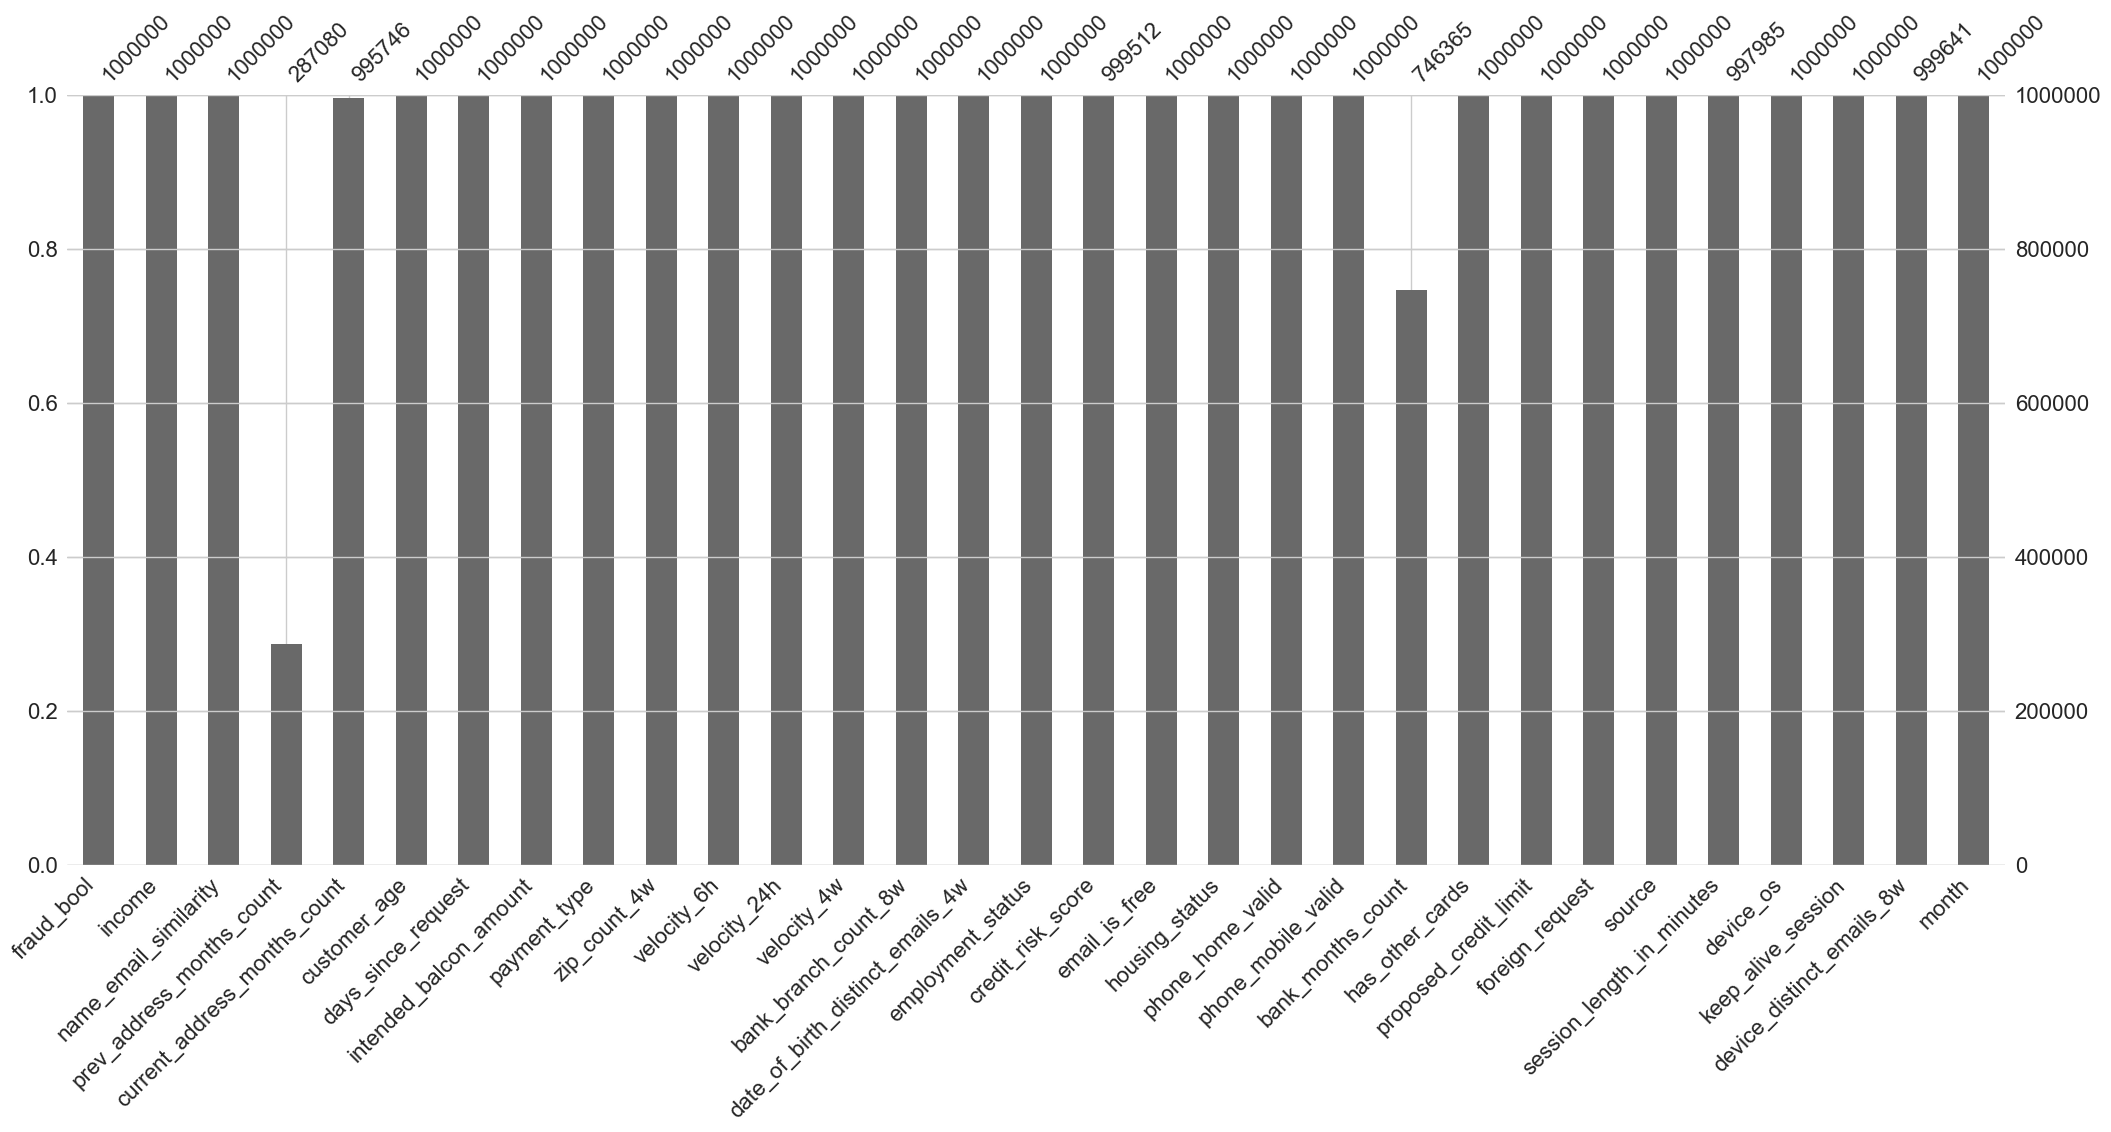

In [12]:
msno.bar(df.data)

<AxesSubplot: >

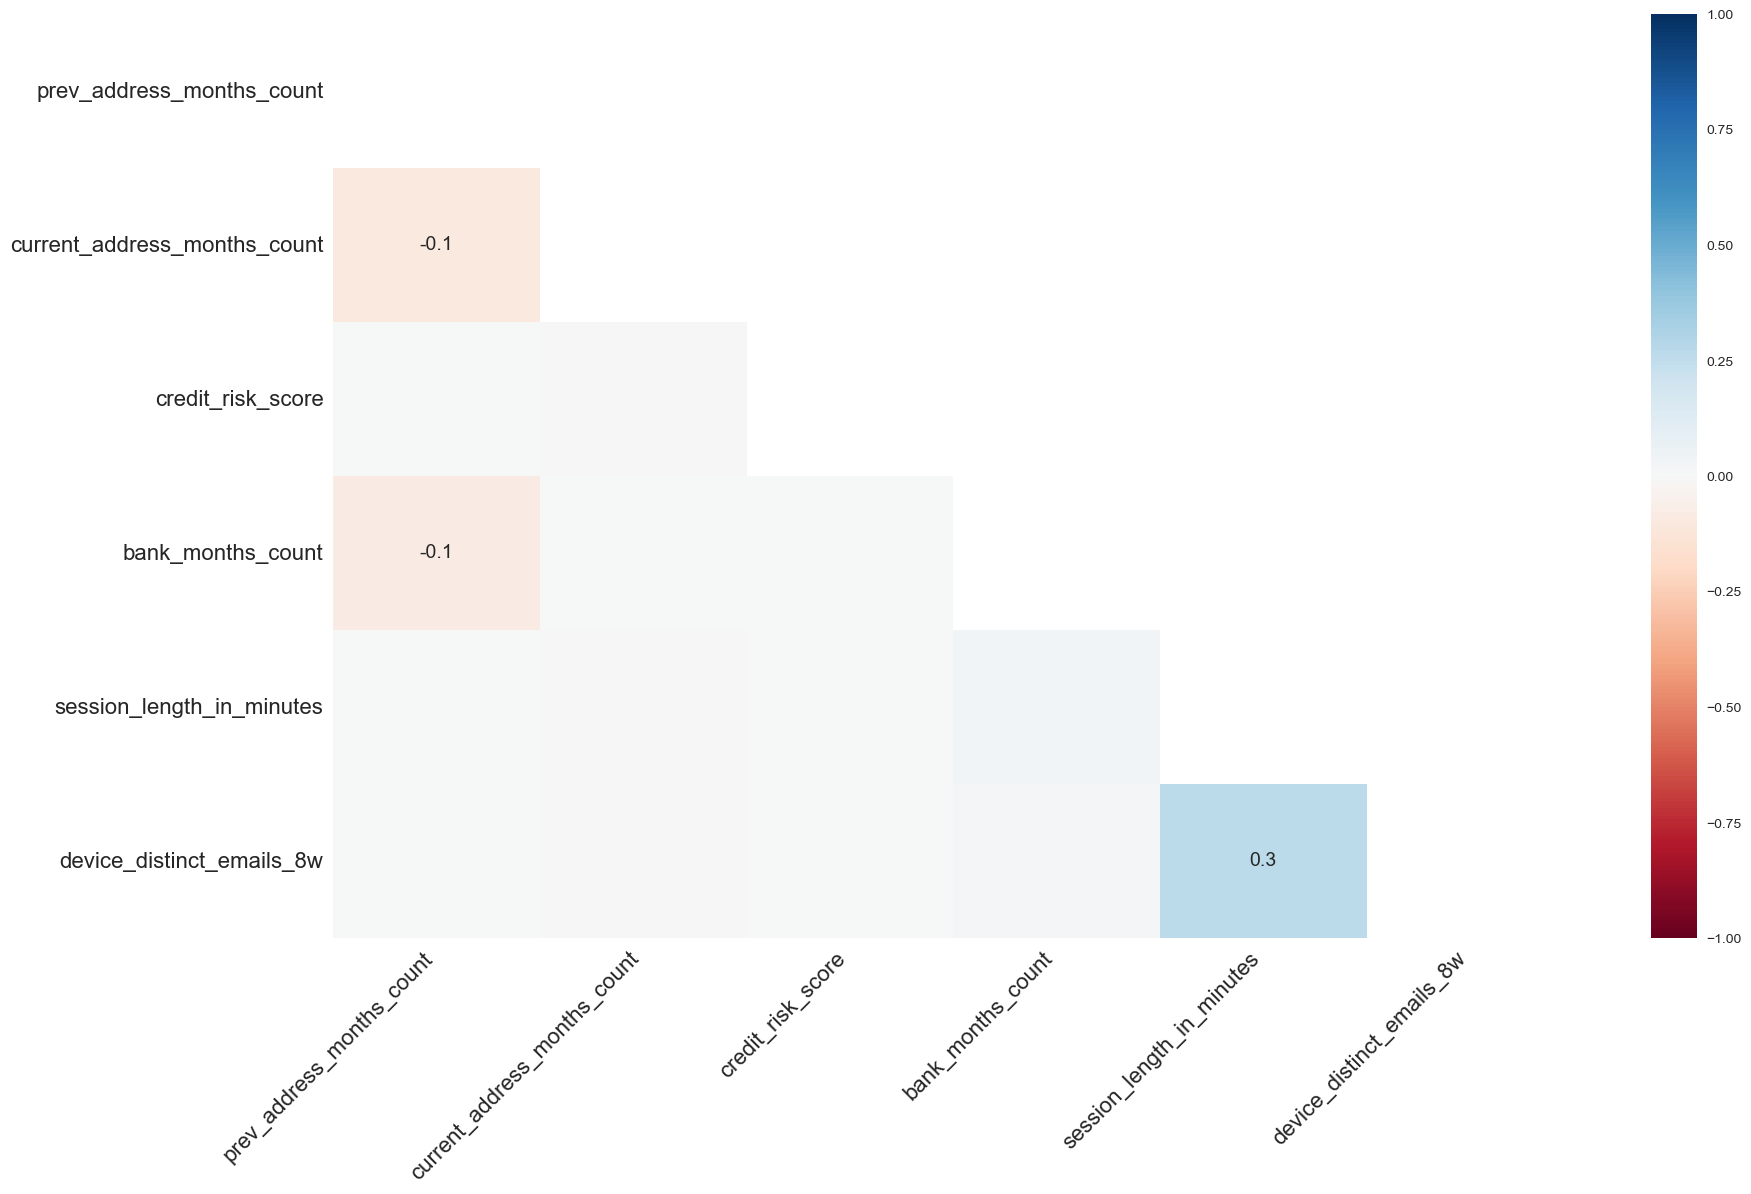

In [13]:
msno.heatmap(df.data)

- there is no correlation between the missing values. 

<AxesSubplot: >

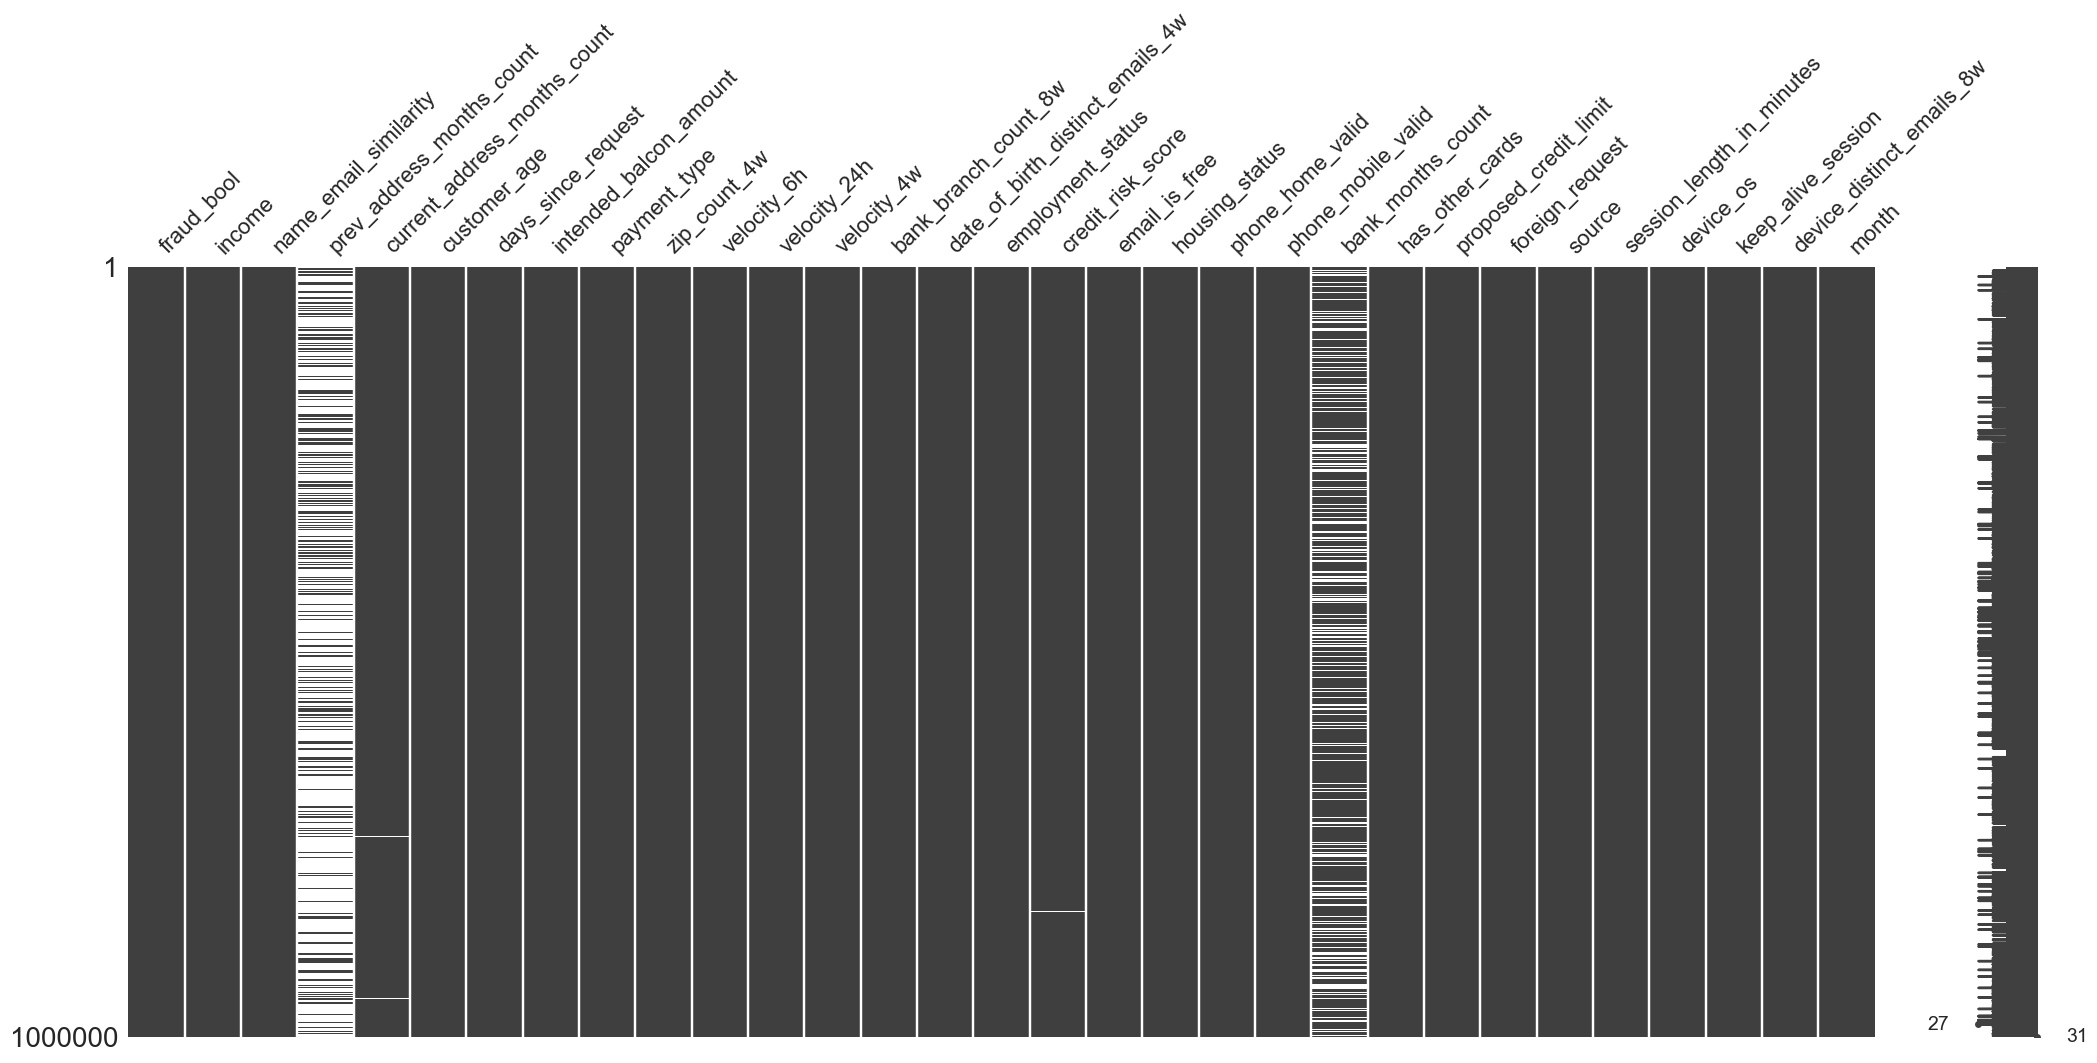

In [14]:
msno.matrix(df.data)

- after this analysis we can say that the pattern of missing values is MCAR.
- i will delete prev_address_months_count as about 70% of the rows have nulls.

In [15]:
df.delete_columns(['prev_address_months_count'])

'Columns prev_address_months_count deleted successfully.'

### Handling the nulls:
- i will replace the nulls of the continous columns with the mean, while using the mode for the categorical columns.

In [16]:
df.data['current_address_months_count'].fillna(df.data.current_address_months_count.mode()[0],inplace=True)
df.data['credit_risk_score'].fillna(df.data.credit_risk_score.mean(),inplace=True)
df.data['bank_months_count'].fillna(df.data.bank_months_count.mode()[0],inplace=True)
df.data['session_length_in_minutes'].fillna(df.data.session_length_in_minutes.mean(),inplace=True)
df.data['device_distinct_emails_8w'].fillna(df.data.device_distinct_emails_8w.mode()[0],inplace=True)

# correlation matrix:

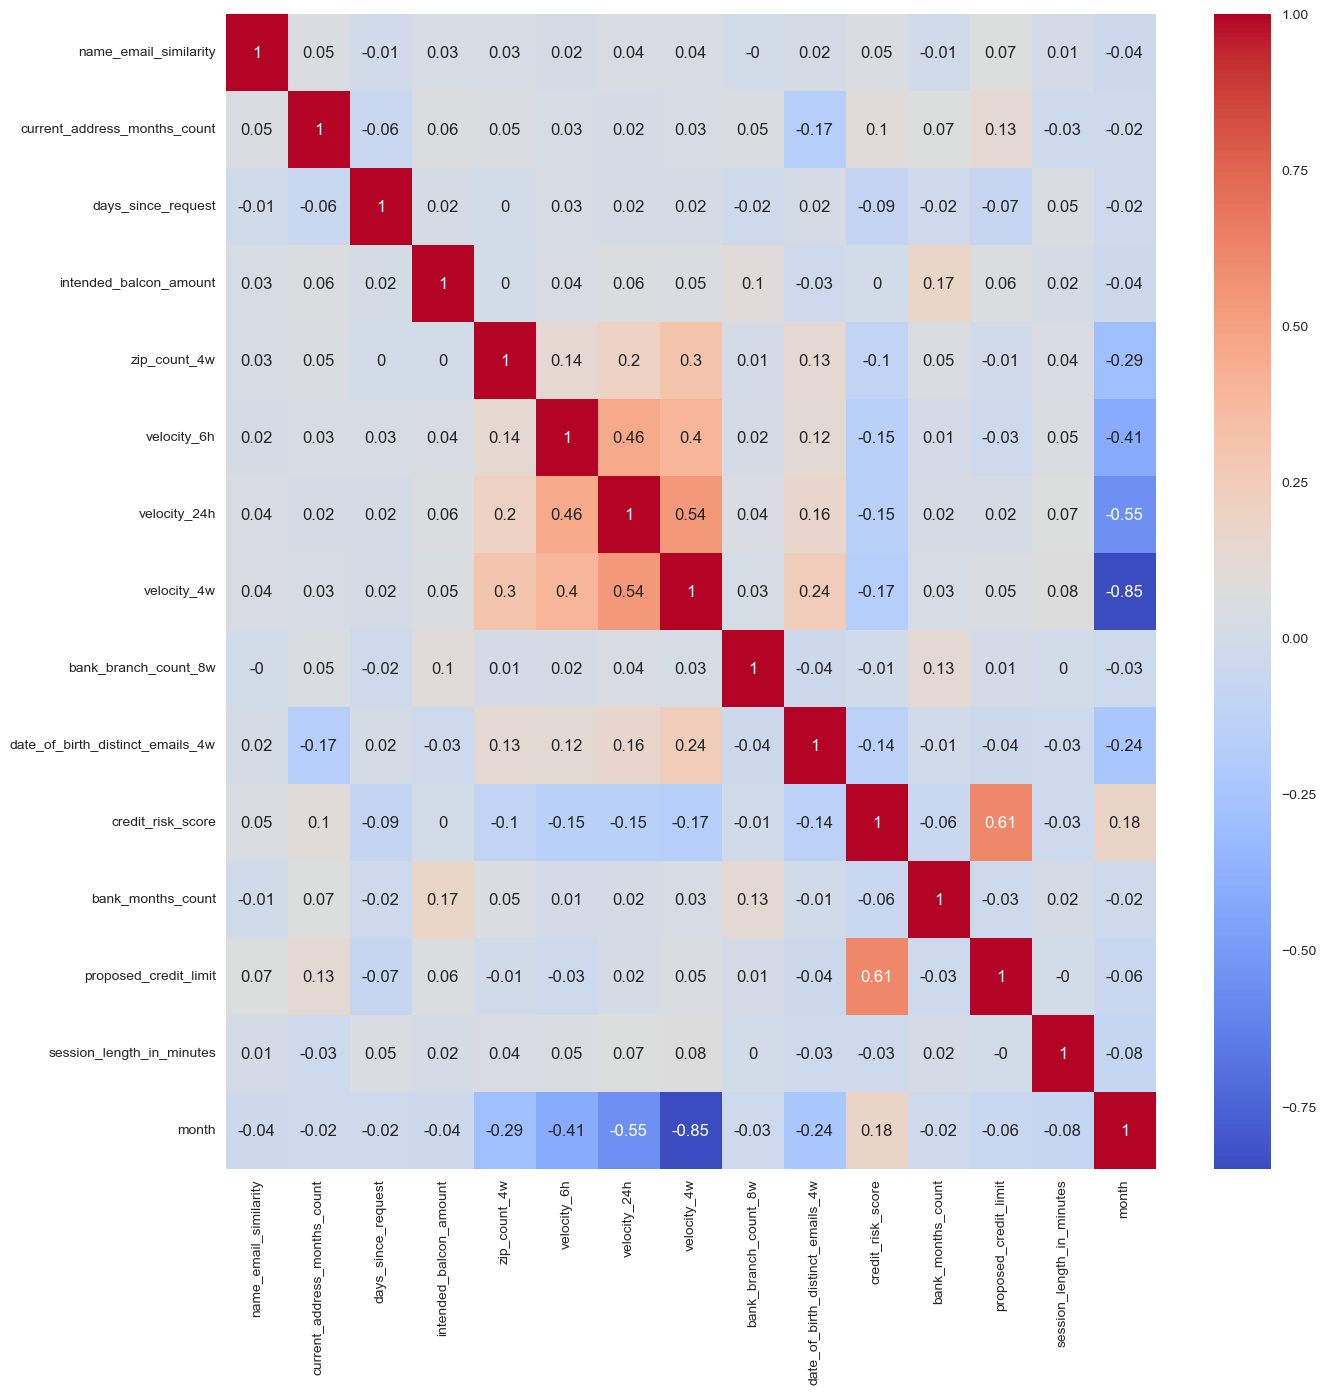

In [17]:
## check the corrrelation between the numerical columns using pearson correlation
df.plot_corr_heatmap()

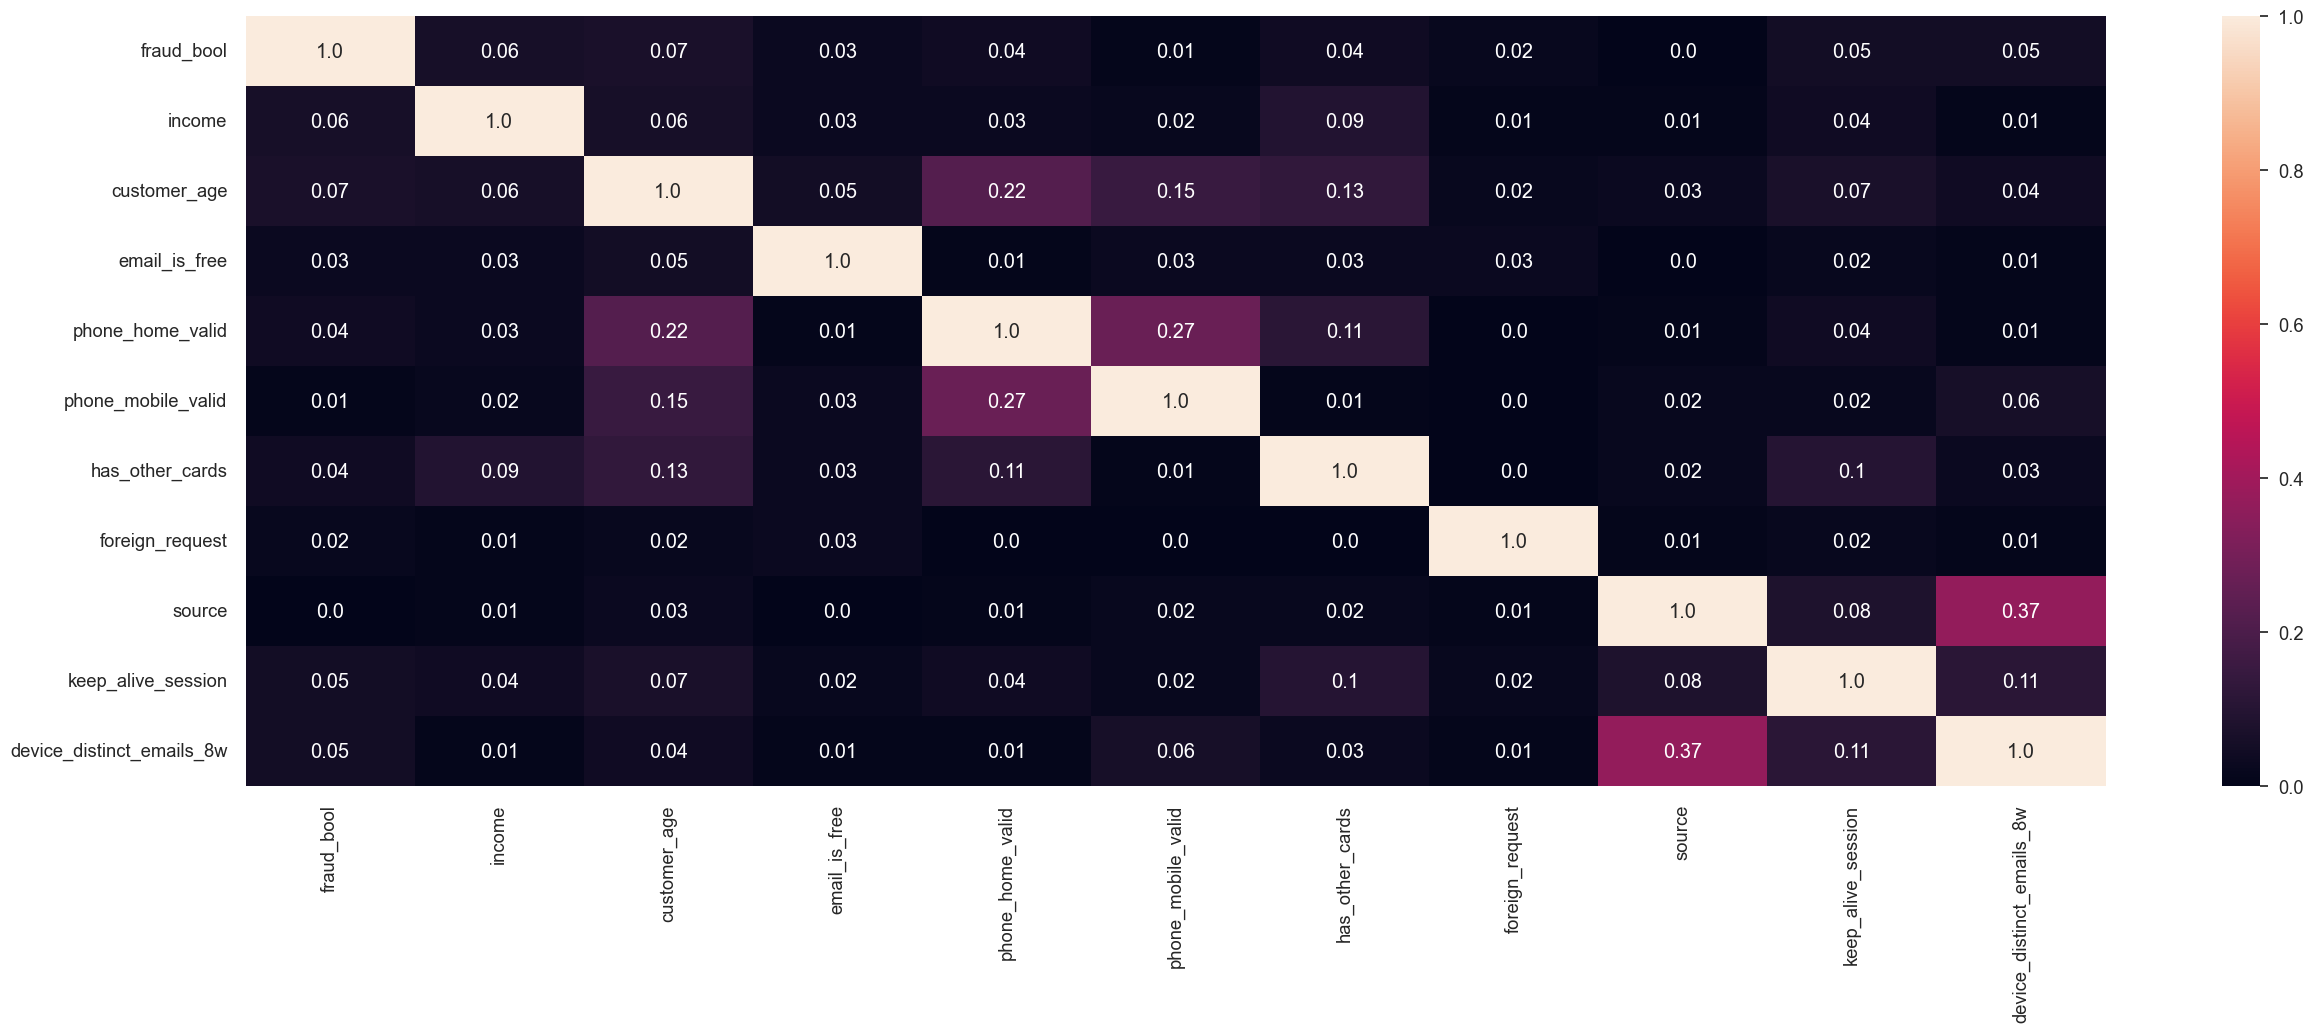

In [18]:
# checking the correlation between the categorical features including the label
df.plot_cramer()

- as we can see there is no correlation between any feature except the correlation between the month and velocity_4w columns, and we willn't pass the month feature to the model, we will only use it as a splitter as mentioned by the authors in the paper.

velocity_4w                        -0.060125
name_email_similarity               0.042839
month                               0.112396
credit_risk_score                   0.297223
velocity_24h                        0.331134
bank_months_count                   0.533668
velocity_6h                         0.562682
date_of_birth_distinct_emails_4w    0.703250
proposed_credit_limit               1.301410
current_address_months_count        1.388237
zip_count_4w                        1.456657
intended_balcon_amount              2.507173
bank_branch_count_8w                2.747161
session_length_in_minutes           3.311915
days_since_request                  9.278955
dtype: float64


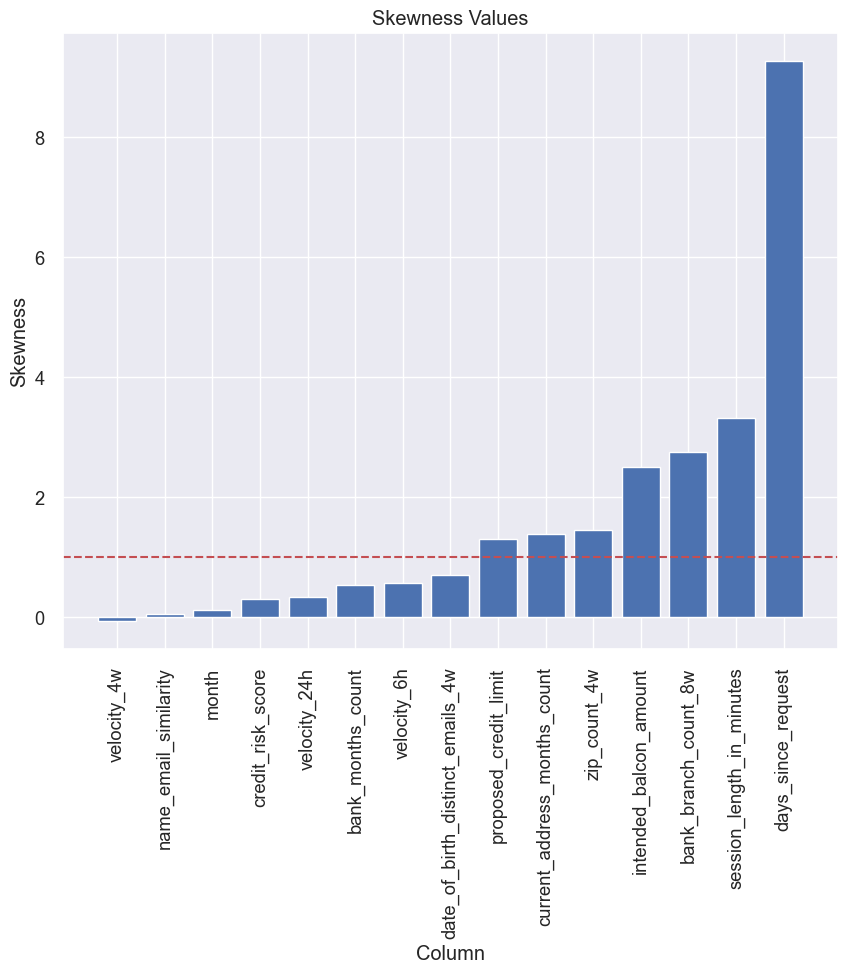

In [19]:
# checking the skewness of numerical features
skewed_columns=df.draw_skewness_barchart()

- as we can see we have many numerical features with high skewness so i will use log transform to handle the skewness.
- i will exclude the intended balcon amount as it contain negative values so the log will return nulls.

In [20]:
for column in skewed_columns:
    if column =='intended_balcon_amount':
        continue
    print(df.apply_log_transform(column))

Log transform applied to column 'current_address_months_count' successfully.
Log transform applied to column 'days_since_request' successfully.
Log transform applied to column 'zip_count_4w' successfully.
Log transform applied to column 'bank_branch_count_8w' successfully.
Log transform applied to column 'proposed_credit_limit' successfully.
Log transform applied to column 'session_length_in_minutes' successfully.


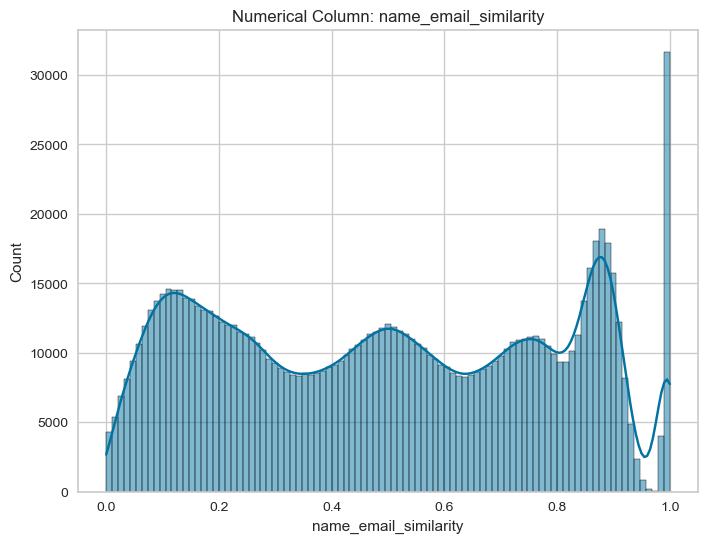

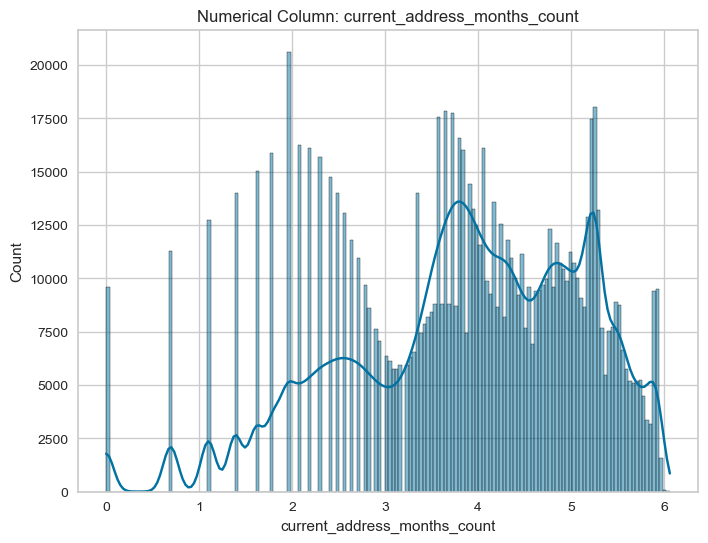

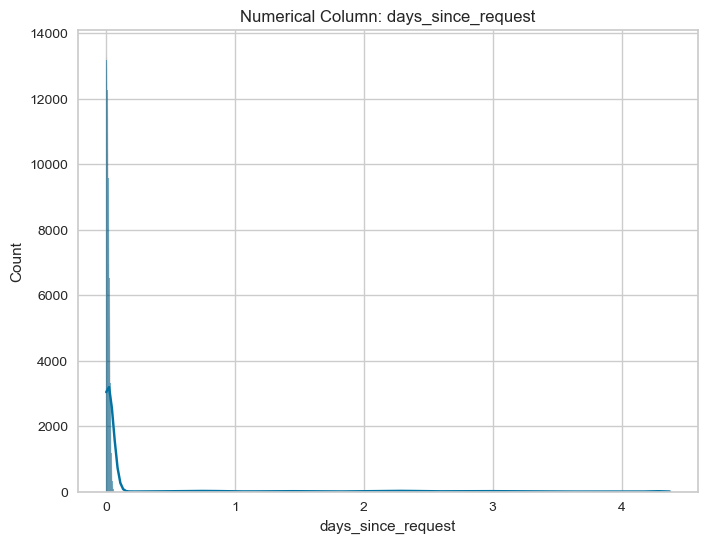

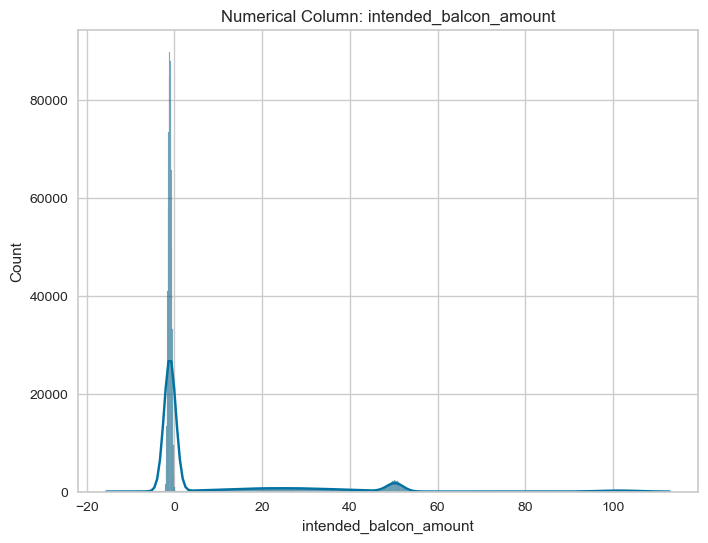

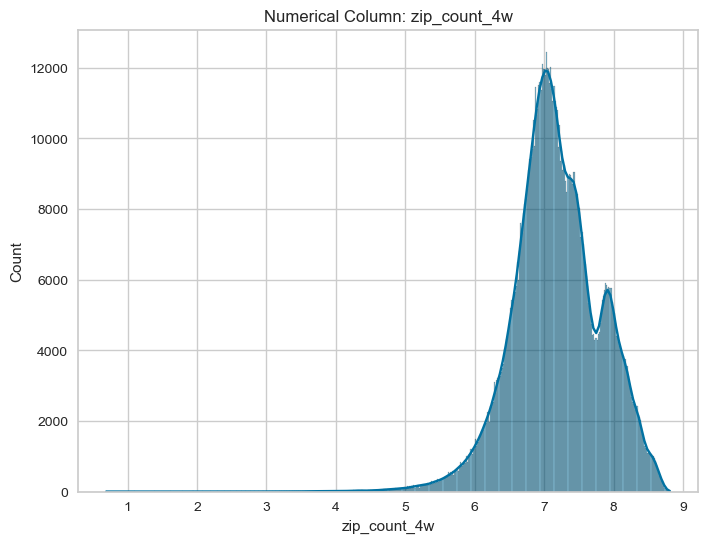

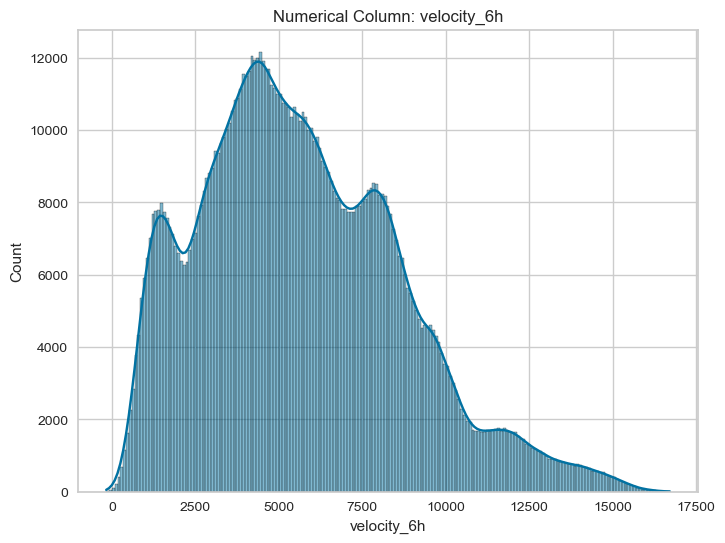

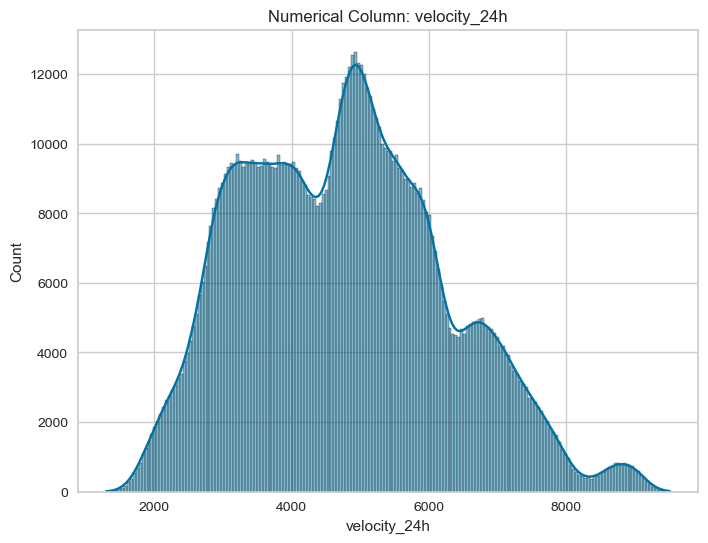

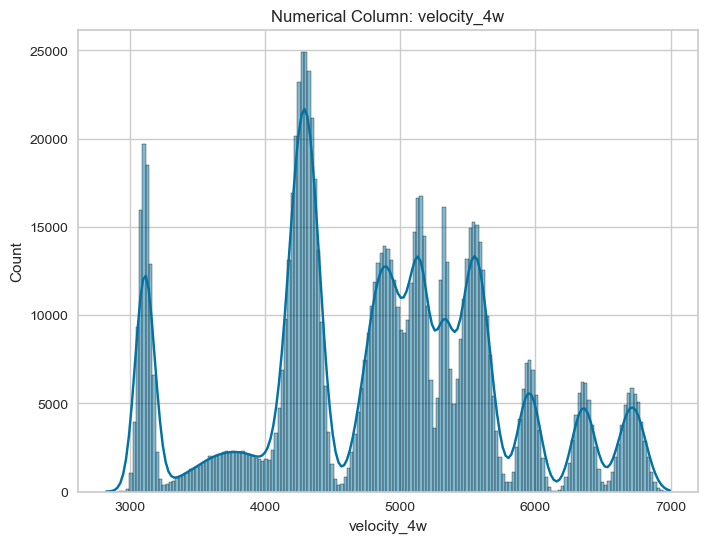

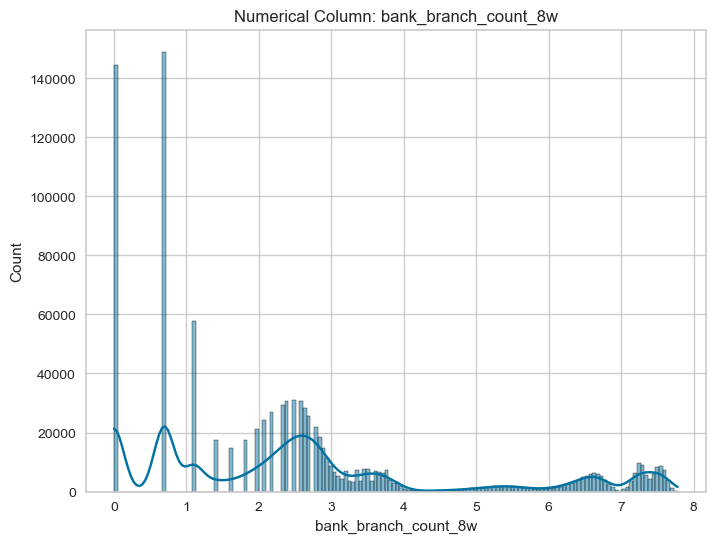

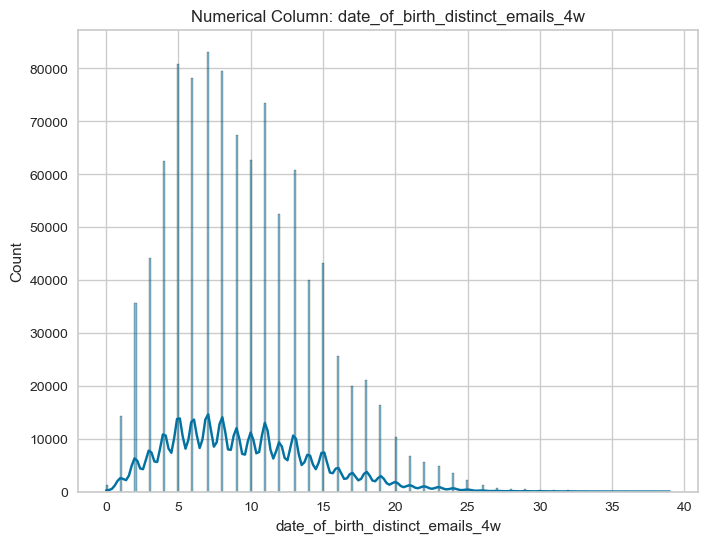

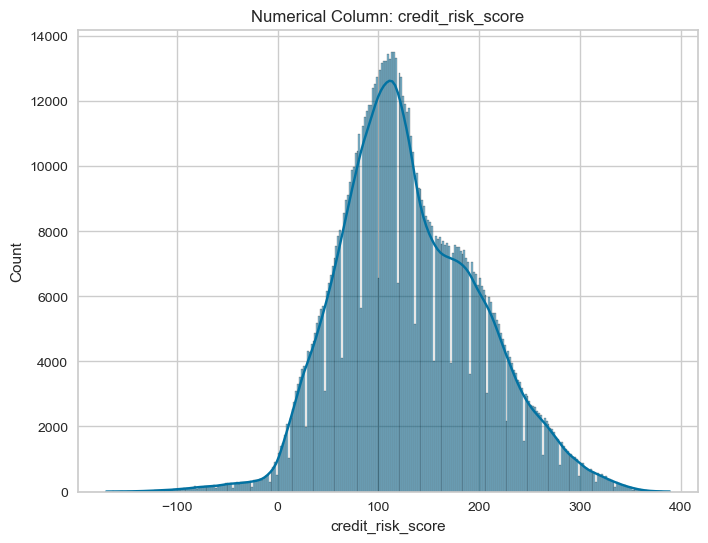

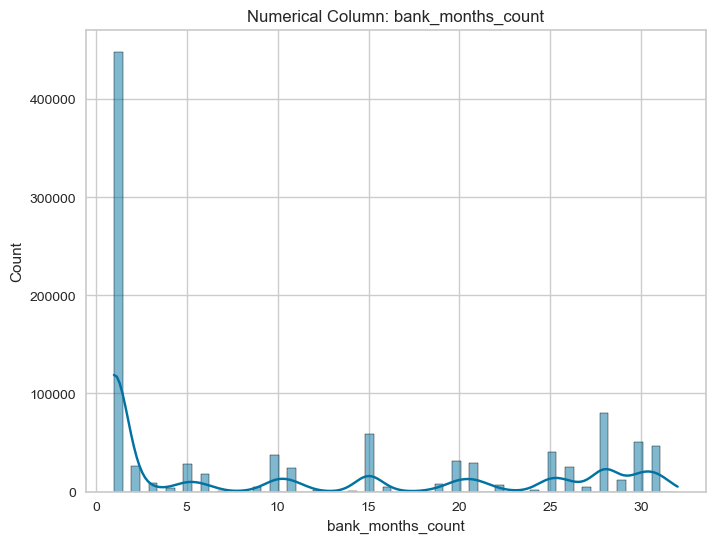

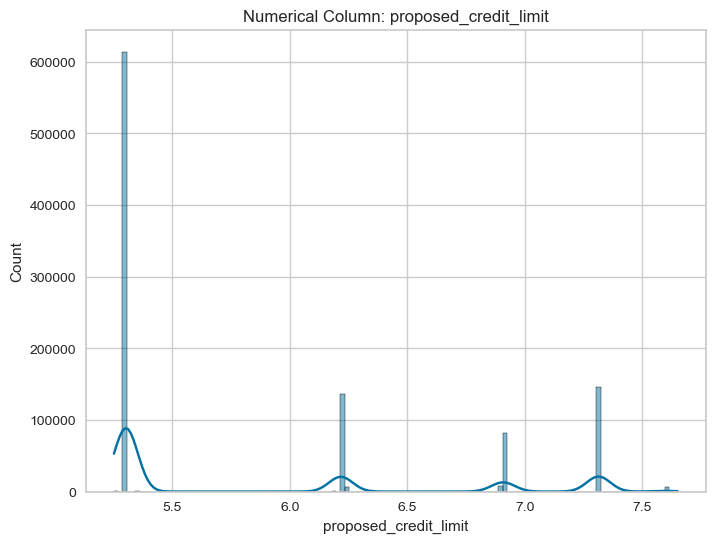

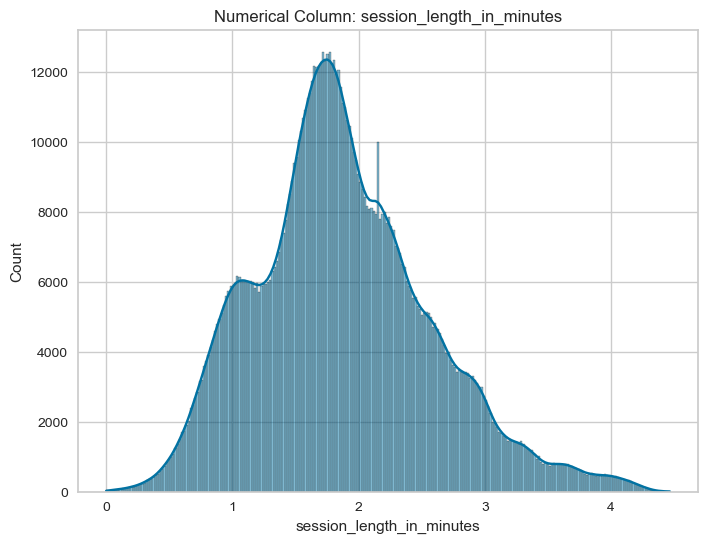

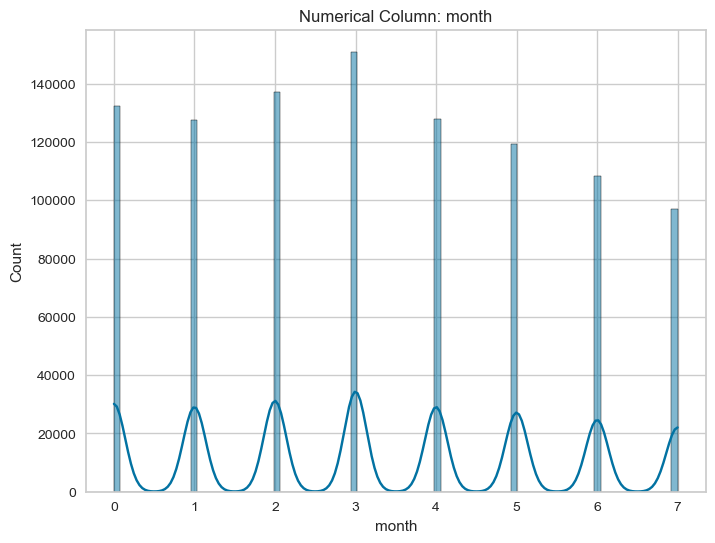

In [30]:
df.plot_numerical_columns()

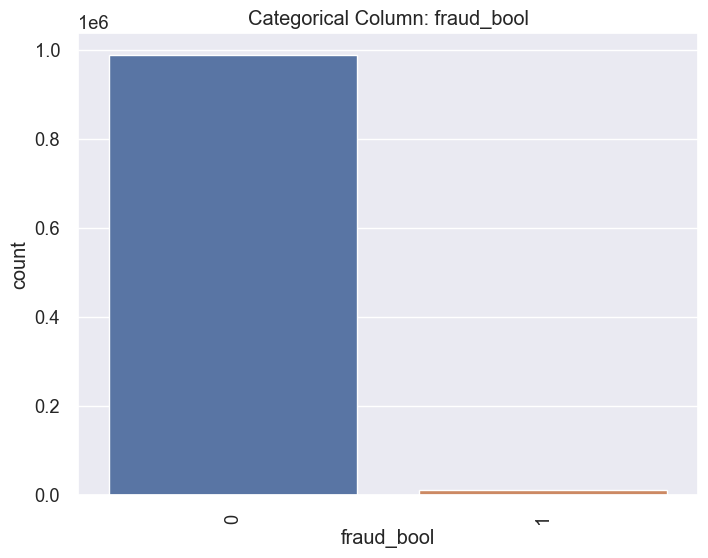

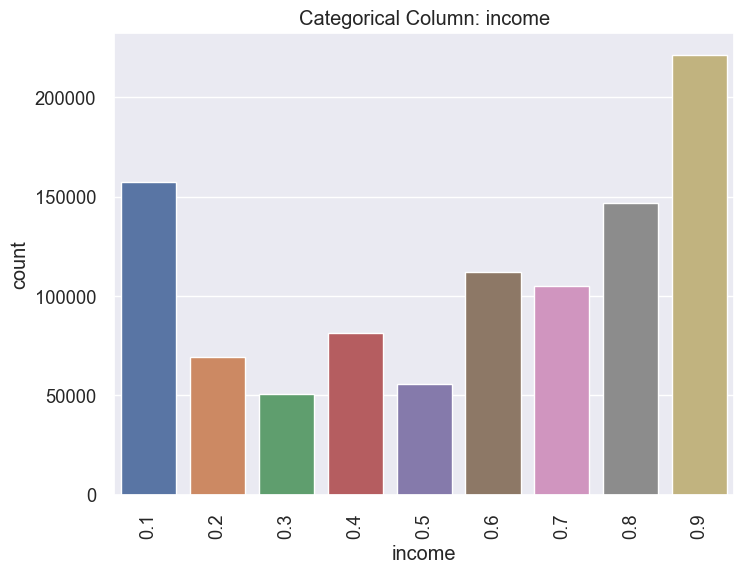

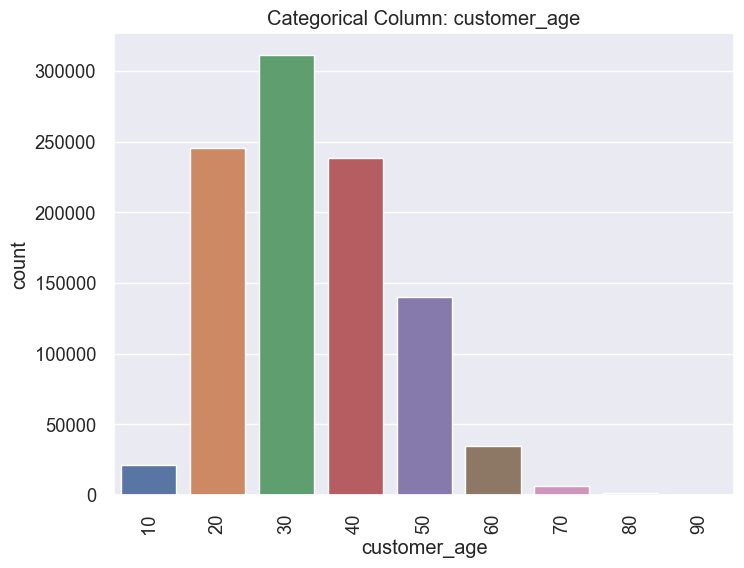

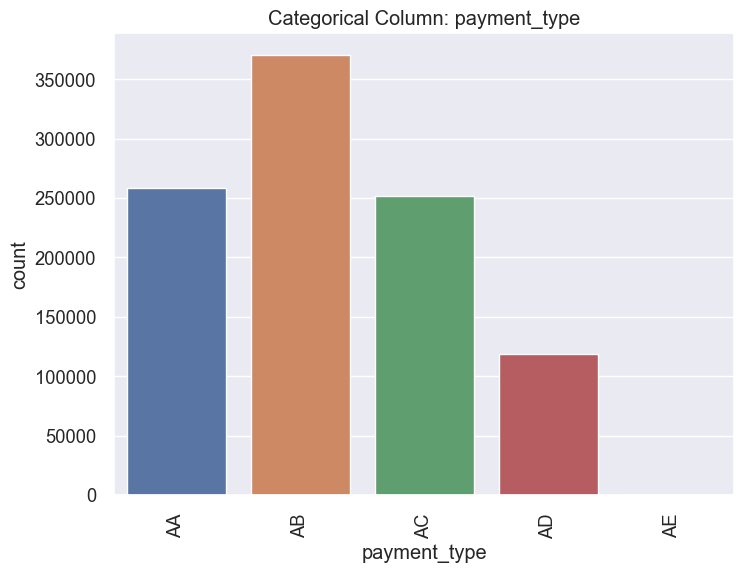

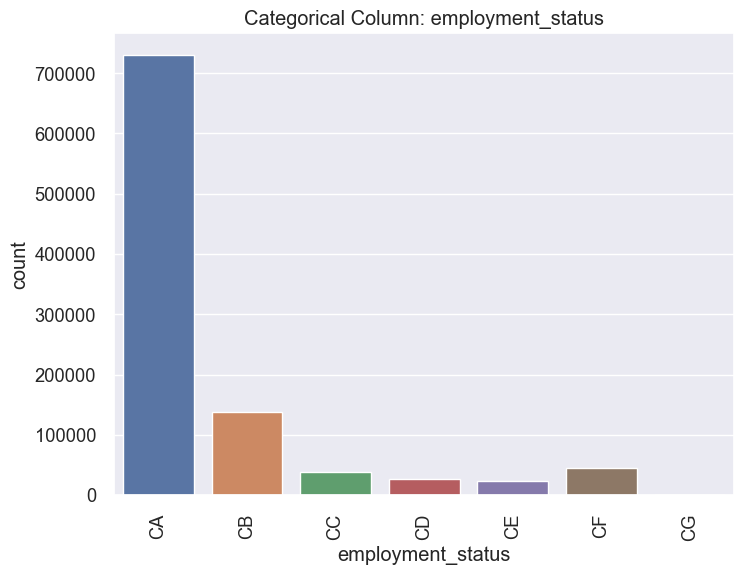

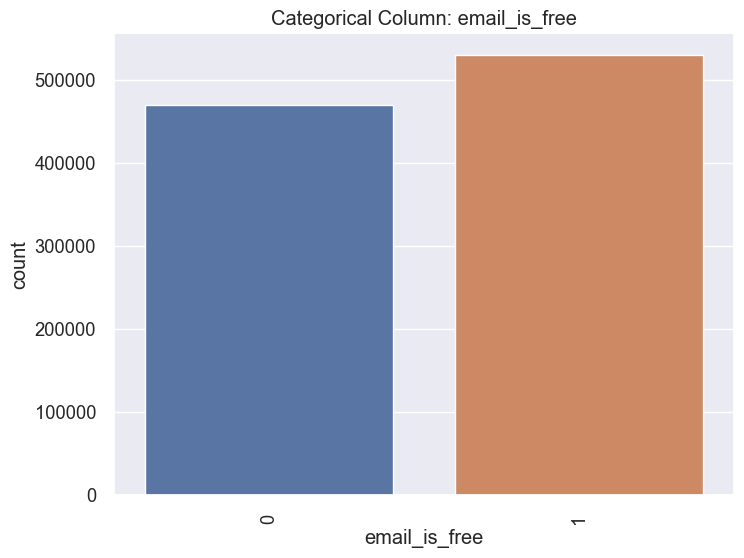

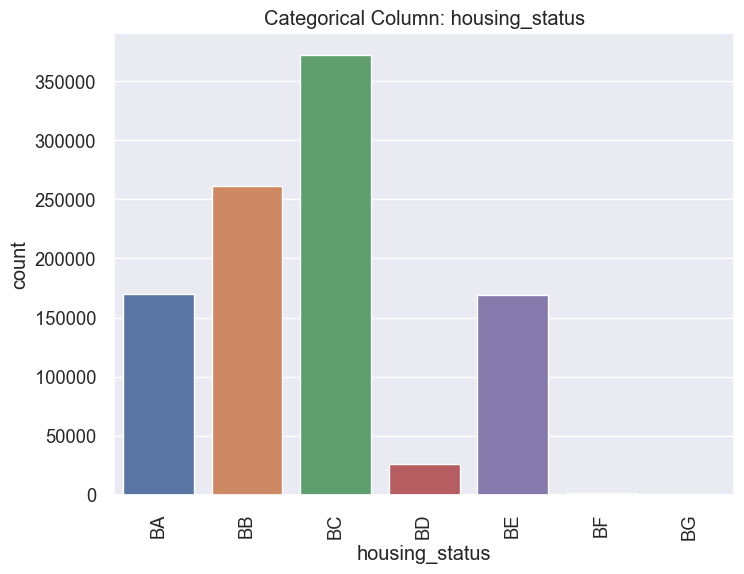

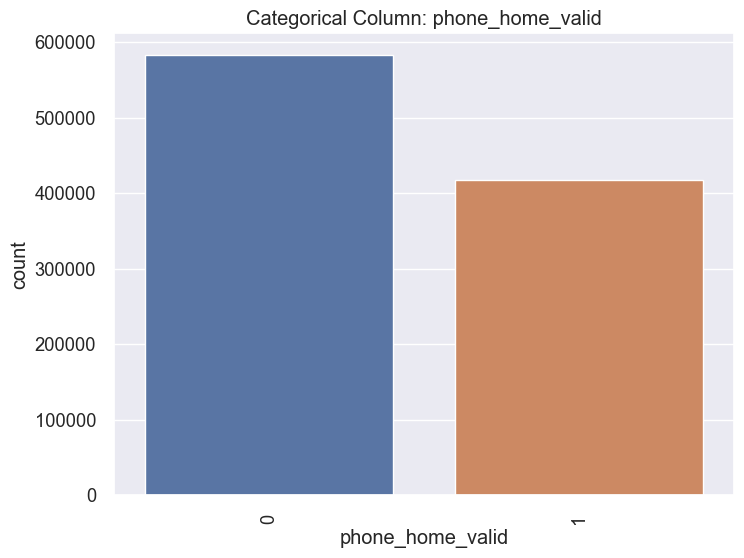

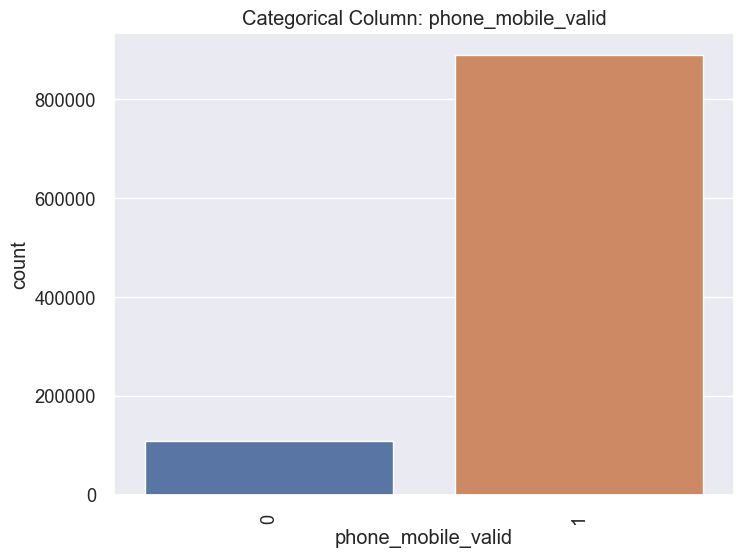

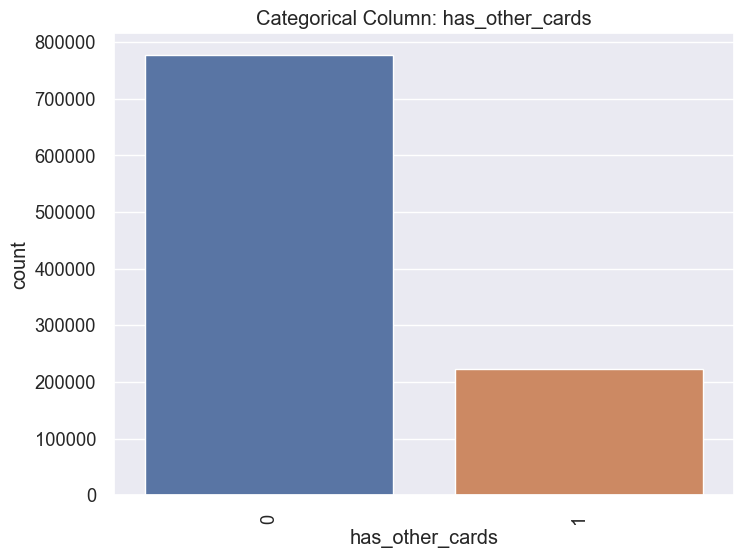

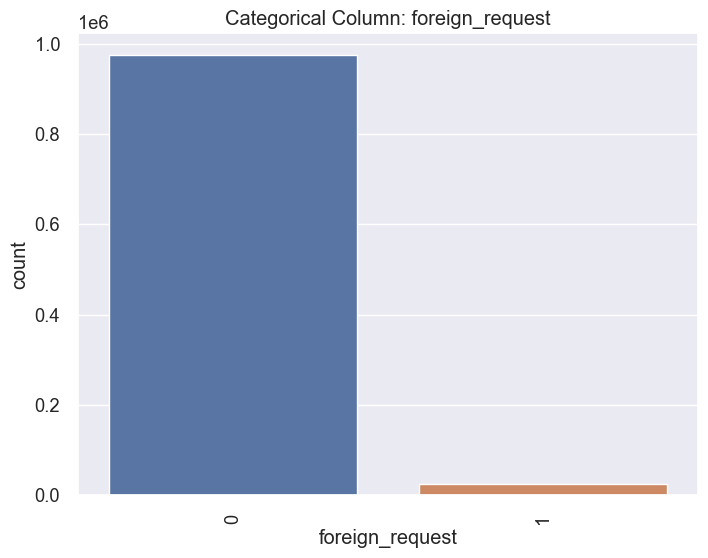

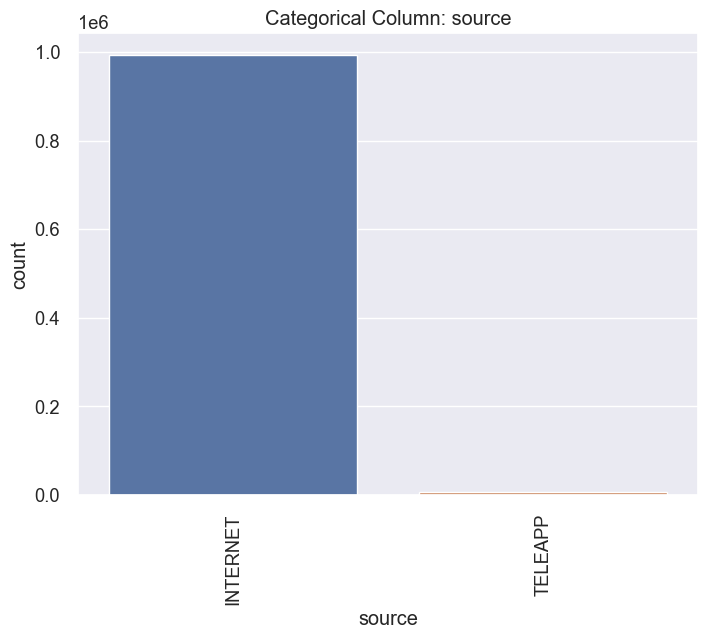

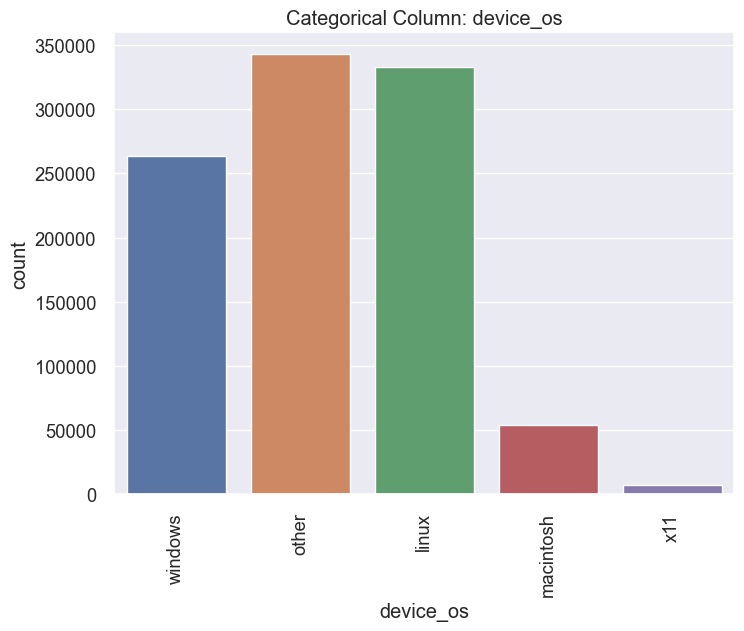

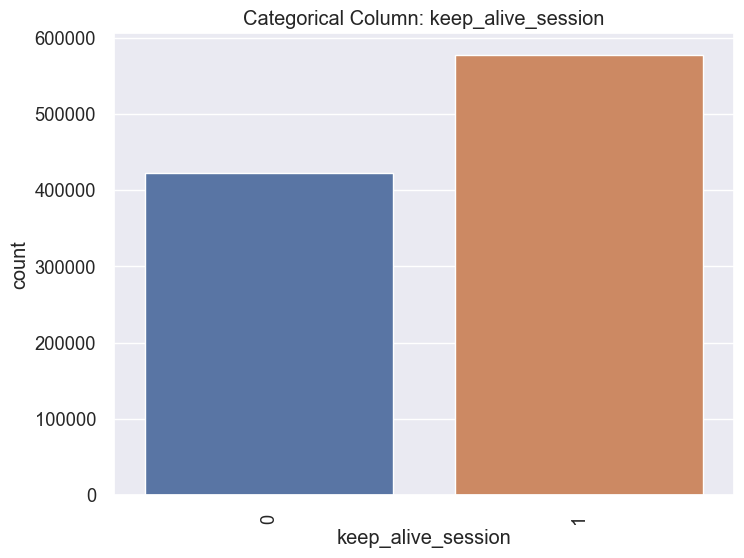

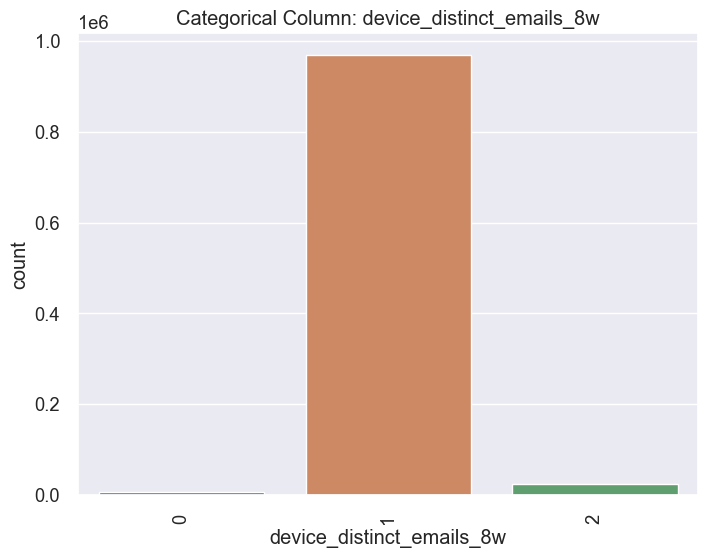

In [32]:
df.plot_categorical_columns()

# Handle the outliers:

In [21]:
df.describe(flag='numerical')

,name_email_similarity,current_address_months_count,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,credit_risk_score,bank_months_count,proposed_credit_limit,session_length_in_minutes,month
count,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,0.493694,3.847946,1.970193e-01,8.661499,7.173563,5665.296605,4769.781965,4856.324016,2.568625,9.503544,131.054037,11.346573,5.886213,1.876368,3.288674
std,0.289125,1.280722,6.440133e-01,20.236155,0.628206,3009.380665,1479.212612,919.843934,2.192405,5.033792,69.620753,11.643213,0.796368,0.696276,2.209994
min,0.000001,0.000000,4.036860e-09,-15.530555,0.693147,-170.603072,1300.307314,2825.748405,0.000000,0.000000,-170.000000,1.000000,5.252273,0.000872,0.000000
1%,0.021672,0.693147,2.825164e-04,-1.831266,5.517453,695.593750,2021.407710,3059.832982,0.000000,1.000000,-14.000000,1.000000,5.303305,0.536846,0.000000
25%,0.225216,2.995732,7.167498e-03,-1.181488,6.796824,3436.365848,3593.179135,4268.368423,0.693147,6.000000,83.000000,1.000000,5.303305,1.416450,1.000000
50%,0.492153,3.970292,1.506174e-02,-0.830507,7.142037,5319.769349,4749.921161,4913.436941,2.302585,9.000000,122.000000,5.000000,5.303305,1.813440,3.000000
75%,0.755567,4.875197,2.599000e-02,4.984176,7.573017,7680.717827,5752.574191,5488.083356,3.258097,13.000000,178.000000,25.000000,6.216606,2.289108,5.000000
99%,0.997470,5.916202,3.135306e+00,100.826524,8.511376,13932.187847,8597.047788,6779.328391,7.588324,23.000000,305.000000,31.000000,7.313887,3.818873,7.000000
max,0.999999,6.061457,4.375215e+00,112.956928,8.810012,16715.565404,9506.896596,6994.764201,7.777374,39.000000,389.000000,32.000000,7.650169,4.464748,7.000000


In [22]:
## i will use the method which we implement in the class this method loop on the numerical features and perform the shapiro test
## to detect if the column is normal or not and return the name of columns with potential outliers.
column_with_outliers=df.find_numerical_columns_with_possible_outliers()

In [23]:
# this function accepts the name of the columns with outliers and clip the values to upper and lower bound
df.handle_outliers(column_with_outliers)

,fraud_bool,income,name_email_similarity,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,...,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,month
0,1,0.9,0.166828,4.488636,50,0.020709,-1.331345,AA,6.646391,10650.765523,...,24.0,0,6.216606,0,INTERNET,1.586807,windows,0,1,7
1,1,0.9,0.296286,4.976734,50,0.005403,-0.816224,AB,5.905362,534.047319,...,15.0,0,7.313887,0,INTERNET,3.490393,windows,0,1,7
2,1,0.9,0.044985,4.890349,40,0.054224,-0.755728,AC,6.769642,4048.534263,...,1.0,0,5.303305,0,INTERNET,1.745489,other,0,1,7
3,1,0.9,0.159511,3.135494,50,0.018900,-1.205124,AB,6.698268,3457.064063,...,31.0,1,5.303305,0,INTERNET,1.114454,linux,0,1,7
4,1,0.9,0.596414,5.389072,50,0.004431,-0.773276,AB,6.792344,5020.341679,...,31.0,0,7.313887,0,INTERNET,1.563441,macintosh,1,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0,0.6,0.192631,4.653960,40,0.030133,-1.044454,AB,6.690842,7905.711839,...,25.0,0,5.303305,0,INTERNET,2.252502,linux,1,1,4
999996,0,0.8,0.322989,2.302585,50,0.054224,-1.409803,AC,8.103797,5391.470463,...,1.0,0,5.303305,0,INTERNET,2.299366,windows,0,1,4
999997,0,0.8,0.879403,3.433987,20,0.018393,14.232671,AA,7.328437,8063.102636,...,11.0,0,5.303305,0,INTERNET,2.218718,other,0,1,4
999998,0,0.9,0.762112,5.247024,20,0.015235,14.232671,AA,7.257708,8092.641762,...,28.0,0,6.216606,0,INTERNET,1.674488,windows,1,1,4


In [24]:
data=df.get_data()

### splitting the data

In [25]:
# split the data according to the paper criteria 0-5 month for training and 6-7 for testing 
X_train, X_test, y_train, y_test=split_data(data,criteria= 'paper')

### forming the groups to test fairness 

In [26]:
train_groups=(X_train["customer_age"] > 50).map({True: ">50", False: "<=50"})
test_groups=(X_test["customer_age"] > 50).map({True: ">50", False: "<=50"})

In [27]:
data = preprocessing(X_train, y_train)


## preprocessing:
- in the baseline experiments we have use the standard scaler and one hot encoding for preprocessing.
- in this experiment i will try different approach by using minmax as scaler and label encoding as encoder

In [28]:
# define a dictionary with the key is the name of the column and the value is the scaler object which is returned from the method
# in the preprocessing class.
scalers = {} 
for column in X_train.select_dtypes(include=['int','float']):
    m,scaler=data.scale_data('minmax',column)
    scalers[column] = scaler

In [29]:
# apply the same scaling on the testset
for column in X_test.select_dtypes(include=['int','float']):
    X_test[column] = scalers[column].transform(X_test[[column]])

In [30]:
# define dictionary with key name of the column and value the label encoder fitted on the training set in the preprocessing class
encoders = {}
for column in X_train.select_dtypes(include=['category','object']):
    _, encoder = data.encode_categorical_features(column , encoding_type= 'one-hot')
    encoders[column] = encoder

In [31]:
# encode the testset using the encoders fitted on the training set
# apply the encoding on the testset
for column in X_test.select_dtypes(include=['object','category']).columns:
    ohe=encoders[column]
    encoded_col = pd.DataFrame(ohe.transform(X_test[column].values.reshape(-1, 1)).toarray(),index=X_test.index)
    encoded_col.columns = [column + '_' + str(val) for val in ohe.categories_[0]]
    X_test = pd.concat([X_test, encoded_col], axis=1)
    X_test.drop(columns=column, inplace=True,axis=1)  

In [32]:
# arrange the column names according to the concat data
X_test=X_test[data.concat_data().columns]

In [33]:
X_train,y_train=data.get_data()

In [35]:
# using random oversampling to handle the imbalanced problem
X_train_res,y_train_res=data.oversample_data()

In [38]:
# the label distribution after resampling
y_train_res.value_counts()

0    786838
1    786838
Name: fraud_bool, dtype: int64

In [39]:
# define modeling instance to start the experiment the modeling instance takes the data and the groups.
experiment=modeling(X_train_res,X_test,y_train_res,y_test,train_groups,test_groups)

# model selection

## logistic regression:

In [40]:
param_grid = {
'class_weight':['balanced']
}
lr = LogisticRegression()

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Best hyperparameters: {'class_weight': 'balanced'}
Best estimator: LogisticRegression(class_weight='balanced')
Best score: 0.8810900169182929
AUC: 0.8812807481868141
TPR:  49.69% 
FPR:  4.99% 
Threshold:  0.76
Predictive Equality:  85.83%


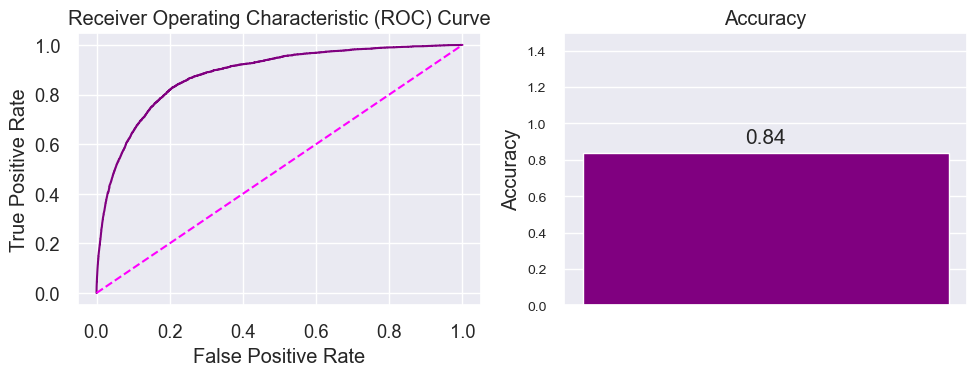

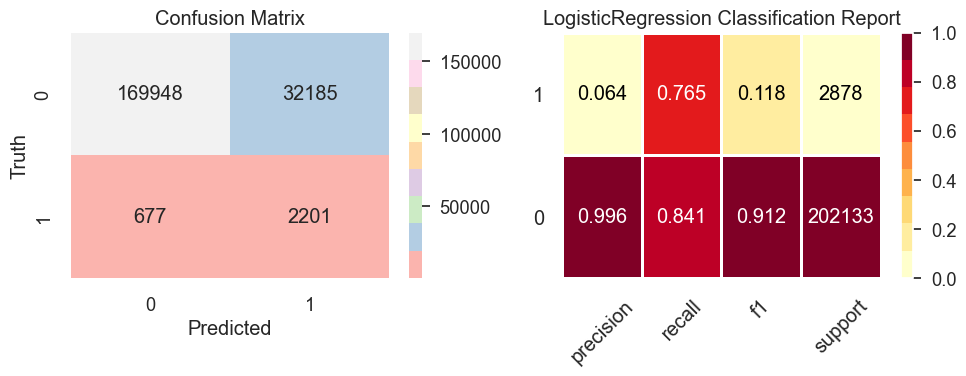

CPU times: total: 1min 12s
Wall time: 38.5 s


In [41]:
%%time
experiment.train(lr,param_grid=param_grid,search_type='random')

In [42]:
saved_model_path = experiment.save_model('models/logistic_regression_model.pkl')
print("Model saved at:", saved_model_path)

Model saved at: models/logistic_regression_model.pkl


**First Experiment - Logistic Regression:**
- AUC: 0.8672208155064458
- TPR: 46.11%
- FPR: 4.99%
- Threshold: 0.77
- Predictive Equality: 89.01%

**Second Experiment - Logistic Regression with Random Oversampling:**
- AUC: 0.8812807481868141
- TPR: 49.69%
- FPR: 4.99%
- Threshold: 0.76
- Predictive Equality: 85.83%

**Comparison and Analysis:**
1. **AUC:** The second experiment's logistic regression model with random oversampling achieved a higher AUC value (0.8813) compared to the first experiment's logistic regression model (0.8672). This indicates that the model with random oversampling performed better in terms of overall discrimination between the positive and negative classes.

2. **TPR:** The second experiment's logistic regression model with random oversampling had a higher True Positive Rate (TPR) of 49.69% compared to 46.11% in the first experiment. This means that the model with random oversampling was better at correctly identifying positive samples.

3. **FPR:** Both logistic regression models had the same False Positive Rate (FPR) of 4.99%, indicating that they misclassified a similar proportion of negative samples as positive.

4. **Threshold:** The threshold used in the second experiment's logistic regression model with random oversampling was 0.76, while the first experiment's logistic regression model used a threshold of 0.77. The threshold of 0.76 led to a slightly higher TPR in the second experiment.

5. **Predictive Equality:** The first experiment's logistic regression model achieved a higher predictive equality score (89.01%) compared to the second experiment's model with random oversampling (85.83%). A lower predictive equality score suggests a more equitable distribution of false positives across different groups. In this case, the first experiment's model demonstrated slightly better fairness in terms of false positive distribution.

**Conclusion:**
- The logistic regression model with random oversampling in the second experiment showed improved discrimination (higher AUC and TPR) compared to the logistic regression model in the first experiment.
- Despite the improved performance, the model with random oversampling had a slightly lower predictive equality score, indicating a somewhat less equitable distribution of false positives compared to the first experiment's model.
- The choice between the two logistic regression models depends on the specific requirements of your application. If fairness is a critical concern, the first experiment's model may be preferred due to its higher predictive equality score. However, if overall performance is the primary focus, the second experiment's model with random oversampling may be a better choice.


# random forest:

In [43]:
param_grid={
    "class_weight":['balanced']
}
rf_model = RandomForestClassifier()

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Best hyperparameters: {'class_weight': 'balanced'}
Best estimator: RandomForestClassifier(class_weight='balanced')
Best score: 1.0
AUC: 0.8284791551473927
TPR:  44.019999999999996% 
FPR:  4.81% 
Threshold:  0.06
Predictive Equality:  40.52%


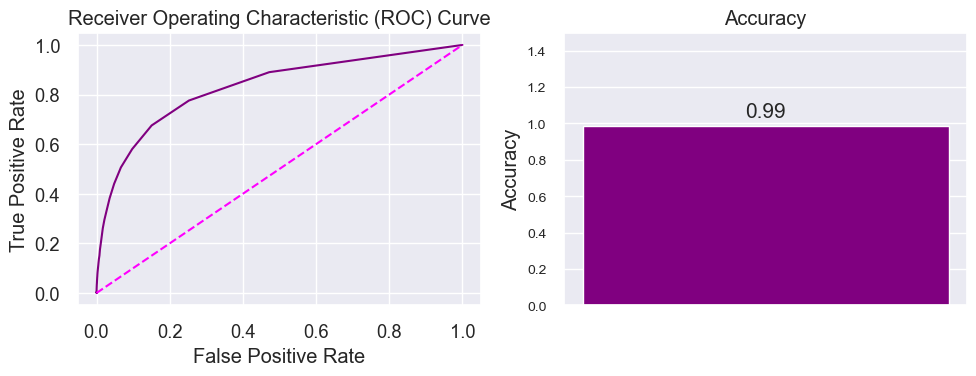

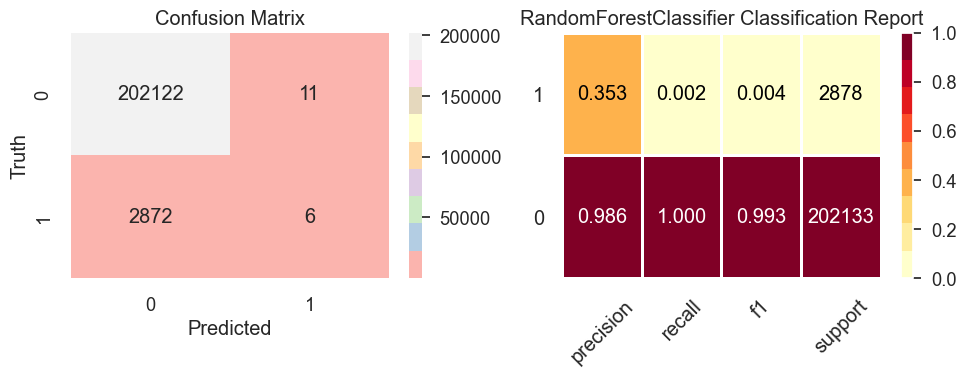

CPU times: total: 8min 19s
Wall time: 15min 4s


In [44]:
%%time
experiment.train(rf_model,param_grid=param_grid,search_type='random')

In [45]:
saved_model_path = experiment.save_model('models/random_forest_model.pkl')
print("Model saved at:", saved_model_path)

Model saved at: models/random_forest_model.pkl


**First Experiment - Random Forest:**
- AUC: 0.7978376098410109
- TPR: 30.54%
- FPR: 3.15%
- Threshold: 0.05
- Predictive Equality: 36.45%

**Second Experiment - Random Forest with Random Oversampling:**
- AUC: 0.8284791551473927
- TPR: 44.02%
- FPR: 4.81%
- Threshold: 0.06
- Predictive Equality: 40.52%

**Comparison and Analysis:**
1. **AUC:** The second experiment's random forest model with random oversampling achieved a higher AUC value (0.8285) compared to the random forest model in the first experiment (0.7978). This suggests that the model with random oversampling performed better in terms of overall discrimination between the positive and negative classes.

2. **TPR:** The second experiment's random forest model had a higher True Positive Rate (TPR) of 44.02% compared to 30.54% in the first experiment. This means that the model with random oversampling was better at correctly identifying positive samples.

3. **FPR:** The second experiment's random forest model had a slightly higher False Positive Rate (FPR) of 4.81% compared to 3.15% in the first experiment. This indicates that the model with random oversampling misclassified a higher proportion of negative samples as positive.

4. **Threshold:** The threshold used in the second experiment's random forest model with random oversampling was 0.06, while the first experiment's random forest model used a threshold of 0.05.

5. **Predictive Equality:** The first experiment's random forest model achieved a higher predictive equality score (36.45%) compared to the second experiment's model with random oversampling (40.52%). A lower predictive equality score suggests a more equitable distribution of false positives across different groups. In this case, the first experiment's model demonstrated slightly better fairness in terms of false positive distribution.

**Conclusion:**
- The random forest model with random oversampling in the second experiment showed improved discrimination (higher AUC and TPR) compared to the random forest model in the first experiment.
- However, the model with random oversampling had a slightly higher FPR, indicating a higher proportion of misclassified negative samples.


# XGboost

In [46]:
# Define the parameter grid for XGBoost
param_grid = {
'scale_pos_weight':[89.67005],
}

# Create the XGBoost model
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Best hyperparameters: {'scale_pos_weight': 89.67005}
Best estimator: XGBClassifier(random_state=42, scale_pos_weight=89.67005)
Best score: 0.8915478951380538
AUC: 0.861607876940312
TPR:  48.4% 
FPR:  5.0% 
Threshold:  1.0
Predictive Equality:  99.94%


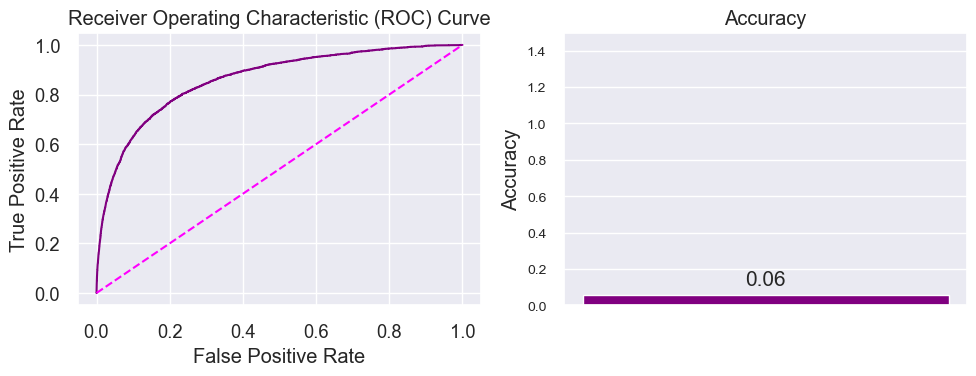

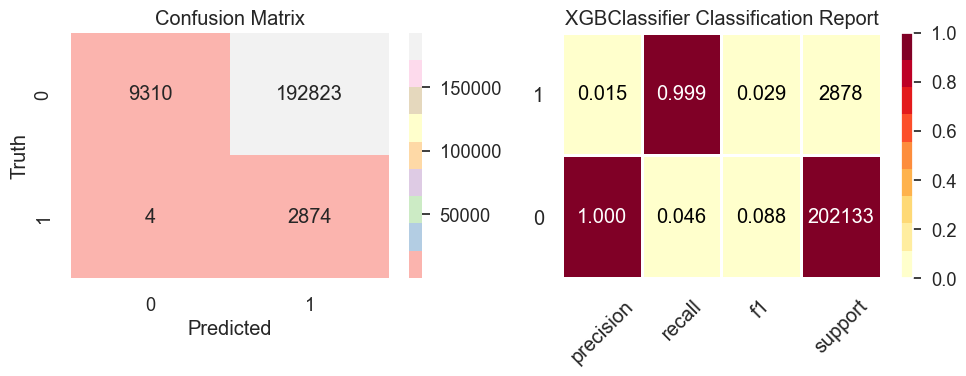

CPU times: total: 6min 17s
Wall time: 11min 16s


In [47]:
%%time
experiment.train(xgb_model,param_grid=param_grid,search_type='random')

Let's compare the results between the two experiments(the one performed in step 2 and this experiment)

**step 2 XGBoost Model:**
- AUC: 0.8886636401169298
- TPR: 52.99%
- FPR: 4.96%
- Threshold: 0.76
- Predictive Equality: 94.11%

**XGBoost with Random Oversampling:**
- AUC: 0.861607876940312
- TPR: 48.4%
- FPR: 5.0%
- Threshold: 1.0
- Predictive Equality: 99.94%

**Comparison and Analysis:**
1. **AUC:** The original XGBoost model achieved a higher AUC value (0.8887) compared to XGBoost with random oversampling (0.8616). This indicates that the original XGBoost model has a better overall ability to distinguish between the positive and negative classes.

2. **TPR:** The original XGBoost model achieved a higher True Positive Rate (TPR) of 52.99% compared to XGBoost with random oversampling, which had a TPR of 48.4%. This means that the original model is better at correctly identifying positive samples.

3. **FPR:** Both models have similar False Positive Rates (FPR). The original XGBoost model had an FPR of 4.96%, while XGBoost with random oversampling had an FPR of 5.0%.

4. **Threshold:** The threshold used for the original XGBoost model was 0.76, while XGBoost with random oversampling used a threshold of 1.0. The threshold of 1.0 means that all samples are classified as the positive class, which explains the high TPR and low FPR in the second experiment.

5. **Predictive Equality:** The predictive equality scores are significantly different between the two experiments. The original XGBoost model achieved a predictive equality score of 94.11%, indicating a more equitable distribution of false positives across different groups. On the other hand, XGBoost with random oversampling achieved a predictive equality score of 99.94%, suggesting almost perfect equity in terms of false positives. However, it's worth noting that the threshold of 1.0 in the second experiment contributes to this high predictive equality score.

**Conclusion:**
- The original XGBoost model outperforms XGBoost with random oversampling in terms of AUC and TPR, indicating better overall performance in distinguishing between classes and correctly identifying positive samples.
- XGBoost with random oversampling achieved a near-perfect predictive equality score, meaning that it distributes false positives more equitably across different groups. However, the use of a threshold of 1.0 might not be practical in real-world scenarios, as it would classify all samples as positive, leading to a loss of discrimination between classes.
- It's essential to strike a balance between fairness and overall model performance. Considerations should be made in choosing the appropriate threshold to achieve fairness while maintaining satisfactory classification performance.



In [48]:
saved_model_path = experiment.save_model('models/xgboost.pkl')
print("Model saved at:", saved_model_path)

Model saved at: models/xgboost.pkl


# using Deep learning

In [49]:
# Keras model using dropout and batch normalization
nn_model = keras.Sequential([
    keras.layers.BatchNormalization(input_shape=[X_train.shape[1]]),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

In [50]:
experiment_n=nn_modeling(nn_model, X_train,X_test,y_train,y_test,train_groups,test_groups)

In [51]:
%%time
hist = experiment_n.compile_and_train(lr = 1e-2)

Epoch 1/100
1398/1398 [==============================] - 8s 4ms/step - loss: 1.0577 - fn: 1679.0000 - fp: 178746.0000 - tn: 528593.0000 - tp: 6472.0000 - precision: 0.0349 - recall: 0.7940 - f1: 0.0706 - val_loss: 0.6426 - val_fn: 0.0000e+00 - val_fp: 28947.0000 - val_tn: 50552.0000 - val_tp: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1: 0.0000e+00
Epoch 2/100
1398/1398 [==============================] - 6s 4ms/step - loss: 1.0008 - fn: 1601.0000 - fp: 154954.0000 - tn: 552385.0000 - tp: 6550.0000 - precision: 0.0406 - recall: 0.8036 - f1: 0.0783 - val_loss: 0.4885 - val_fn: 0.0000e+00 - val_fp: 21258.0000 - val_tn: 58241.0000 - val_tp: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1: 0.0000e+00
Epoch 3/100
1398/1398 [==============================] - 6s 4ms/step - loss: 0.9860 - fn: 1653.0000 - fp: 148728.0000 - tn: 558611.0000 - tp: 6498.0000 - precision: 0.0419 - recall: 0.7972 - f1: 0.0806 - val_loss: 0.9372 - val_fn: 0.0000e+00 

6407/6407 [==============================] - 4s 655us/step
AUC: 0.8815430299992346
TPR:  51.080000000000005% 
FPR:  4.9799999999999995% 
Threshold:  0.94
Predictive Equality:  95.98%


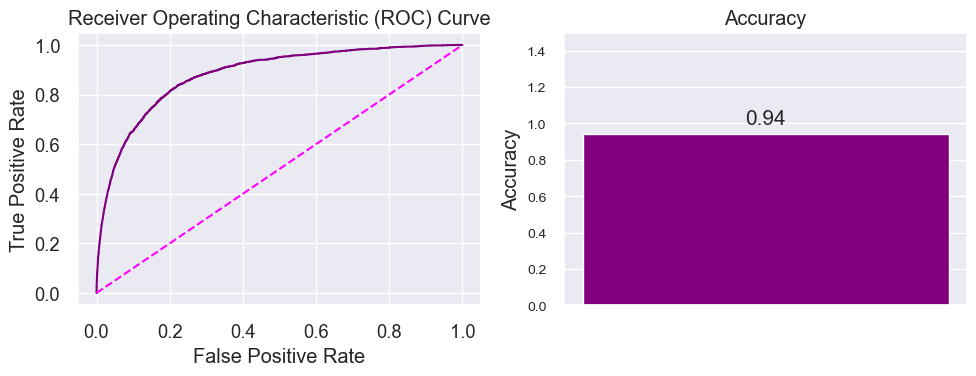

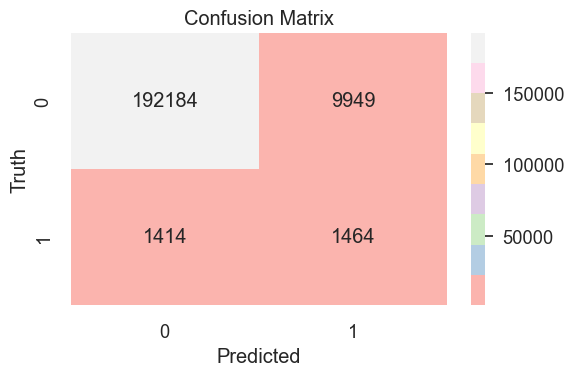

              precision    recall  f1-score   support

           0       0.99      0.95      0.97    202133
           1       0.13      0.51      0.20      2878

    accuracy                           0.94    205011
   macro avg       0.56      0.73      0.59    205011
weighted avg       0.98      0.94      0.96    205011



In [52]:
experiment_n.score_keras_model()

In [53]:
saved_model_path = experiment_n.save_model('models/deeplearning')
print("Model saved at:", saved_model_path)

INFO:tensorflow:Assets written to: models/deeplearning\assets


INFO:tensorflow:Assets written to: models/deeplearning\assets


Model saved at: models/deeplearning


**First Experiment - Deep Learning:**
- AUC: 0.8787728854394705
- TPR: 49.44%
- FPR: 4.99%
- Threshold: 0.96
- Predictive Equality: 96.49%

**Second Experiment - Deep Learning with Random Oversampling:**
- AUC: 0.8815430299992346
- TPR: 51.08%
- FPR: 4.98%
- Threshold: 0.94
- Predictive Equality: 95.98%

**Comparison and Analysis:**
1. **AUC:** The second experiment's deep learning model with random oversampling achieved a slightly higher AUC value (0.8815) compared to the deep learning model in the first experiment (0.8788). This indicates a slight improvement in the model's overall ability to distinguish between the positive and negative classes.

2. **TPR:** The second experiment's deep learning model had a higher True Positive Rate (TPR) of 51.08% compared to 49.44% in the first experiment. This means that the model with random oversampling was better at correctly identifying positive samples.

3. **FPR:** Both deep learning models had similar False Positive Rates (FPR). The second experiment's model with random oversampling had an FPR of 4.98%, slightly lower than the 4.99% FPR in the first experiment.

4. **Threshold:** The threshold used in the second experiment's deep learning model with random oversampling was 0.94, while the first experiment's deep learning model used a threshold of 0.96.

5. **Predictive Equality:** The first experiment's deep learning model achieved a slightly higher predictive equality score (96.49%) compared to the second experiment's model with random oversampling (95.98%). Both models have very high predictive equality scores, indicating a very equitable distribution of false positives across different groups.

**Conclusion:**
- The deep learning model with random oversampling in the second experiment showed a slight improvement in performance (higher AUC and TPR) compared to the deep learning model in the first experiment.
- Both models demonstrated very high predictive equality scores, indicating a highly equitable distribution of false positives across different groups.

# Ada boost:


In [54]:
from sklearn.ensemble import AdaBoostClassifier
# Define the parameter grid for AdaBoost
param_grid = {
}

# Create the AdaBoost model
adaboost_model = AdaBoostClassifier(random_state=42)

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Best hyperparameters: {}
Best estimator: AdaBoostClassifier(random_state=42)
Best score: 0.8930983657225533
AUC: 0.888325396374559
TPR:  53.510000000000005% 
FPR:  5.0% 
Threshold:  0.51
Predictive Equality:  100.0%


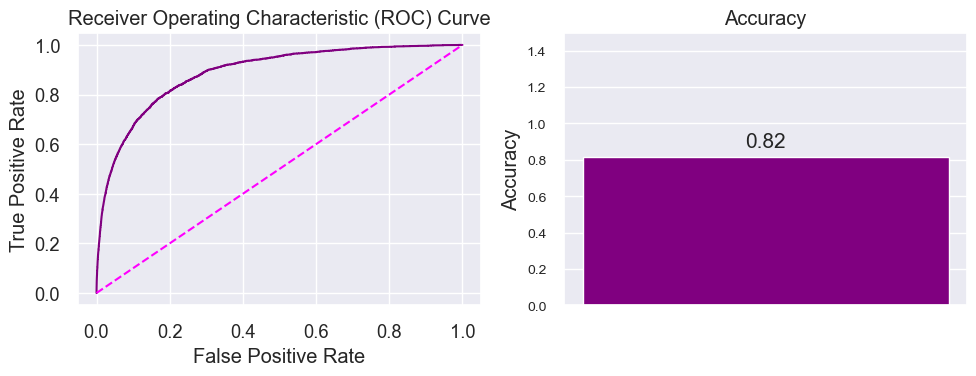

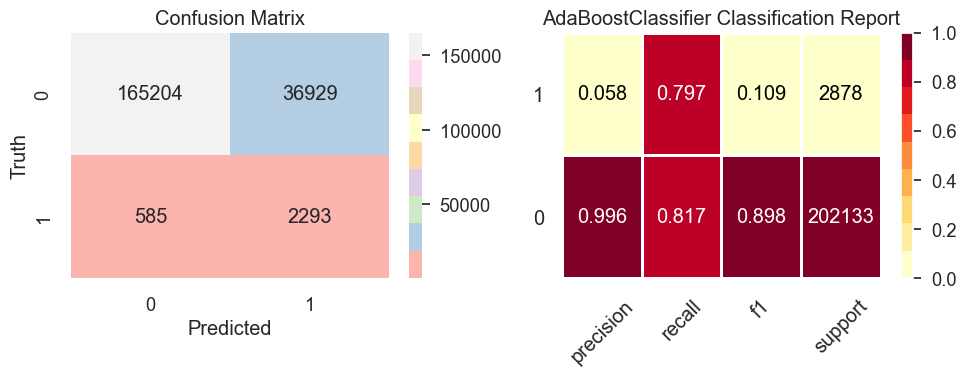

CPU times: total: 3min 48s
Wall time: 6min 44s


In [55]:
%%time
experiment.train(adaboost_model,param_grid=param_grid,search_type='random')

In [56]:
saved_model_path = experiment.save_model('models/adaboost.pkl')
print("Model saved at:", saved_model_path)

Model saved at: models/adaboost.pkl


**First Experiment - AdaBoost:**
- AUC: 0.8893615134892144
- TPR: 53.47%
- FPR: 5.00%
- Threshold: 0.48
- Predictive Equality: 100.00%

**Second Experiment - AdaBoost with Random Oversampling:**
- AUC: 0.888325396374559
- TPR: 53.51%
- FPR: 5.00%
- Threshold: 0.51
- Predictive Equality: 100.00%

**Comparison and Analysis:**
1. **AUC:** The first and second experiments' AdaBoost models achieved similar AUC values. The AUC value in the first experiment was 0.8894, while the second experiment had an AUC value of 0.8883.

2. **TPR:** Both experiments' AdaBoost models had similar True Positive Rates (TPR). The TPR in the first experiment was 53.47%, and the second experiment had a TPR of 53.51%.

3. **FPR:** Both experiments' AdaBoost models had identical False Positive Rates (FPR) of 5.00%.

4. **Threshold:** The threshold used in the first experiment's AdaBoost model was 0.48, while the second experiment's model used a threshold of 0.51.

5. **Predictive Equality:** Both experiments' AdaBoost models achieved a perfect predictive equality score of 100.00%. This indicates a completely equitable distribution of false positives across different groups in both experiments.

**Conclusion:**
- The AdaBoost model with random oversampling in the second experiment showed similar performance (similar AUC, TPR, and FPR) compared to the AdaBoost model in the first experiment.
- Both models demonstrated a perfect predictive equality score, indicating a completely equitable distribution of false positives across different groups in both experiments.


# catboost

In [57]:
import catboost as cb
param_grid={}
catboost = cb.CatBoostClassifier(
    iterations=100,             # Number of boosting iterations (trees) to train
    learning_rate=0.1,          # Learning rate (shrinkage factor to prevent overfitting)
    depth=6,                    # Depth of the trees
    loss_function='Logloss',    # Loss function for binary classification
    eval_metric='AUC',          # Evaluation metric (Area Under the ROC Curve)
    random_seed=42,             # Random seed for reproducibility
    verbose=False               # Set to True to display training progress
)

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Best hyperparameters: {}
Best estimator: <catboost.core.CatBoostClassifier object at 0x0000019B25D46490>
Best score: 0.8916225337501367
AUC: 0.8902363245259631
TPR:  54.169999999999995% 
FPR:  5.0% 
Threshold:  0.04
Predictive Equality:  30.259999999999998%


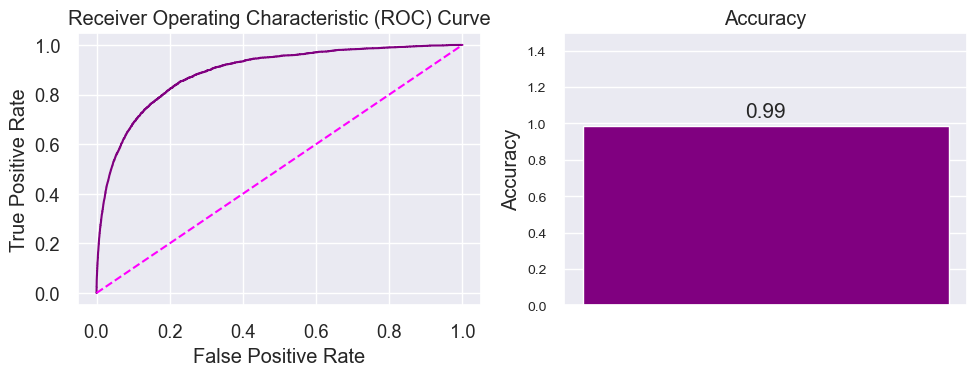

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    202133
           1       0.58      0.02      0.04      2878

    accuracy                           0.99    205011
   macro avg       0.78      0.51      0.51    205011
weighted avg       0.98      0.99      0.98    205011

CPU times: total: 11.2 s
Wall time: 15.8 s


In [58]:
%%time
experiment=modeling(X_train,X_test,y_train,y_test,train_groups,test_groups,name='catboost')
experiment.train(catboost,param_grid=param_grid,search_type='random')

In [59]:
saved_model_path = experiment.save_model('models/catboost.pkl')
print("Model saved at:", saved_model_path)

Model saved at: models/catboost.pkl


**First Experiment - CatBoost:**
- AUC: 0.8896733089343637
- TPR: 54.24%
- FPR: 5.00%
- Threshold: 0.04
- Predictive Equality: 25.59%

**Second Experiment - CatBoost with Random Oversampling:**
- AUC: 0.8902363245259631
- TPR: 54.17%
- FPR: 5.00%
- Threshold: 0.04
- Predictive Equality: 30.26%

**Comparison and Analysis:**
1. **AUC:** The second experiment's CatBoost model with random oversampling achieved a slightly higher AUC value (0.8902) compared to the CatBoost model in the first experiment (0.8897). This indicates a slight improvement in the model's overall ability to distinguish between the positive and negative classes.

2. **TPR:** The TPR in the second experiment's CatBoost model was 54.17%, slightly lower than the TPR in the first experiment (54.24%). Both models, however, have similar performance in correctly identifying positive samples.

3. **FPR:** Both experiments' CatBoost models had the same False Positive Rate (FPR) of 5.00%.

4. **Threshold:** The threshold used in both the first and second experiment's CatBoost models was 0.04.

5. **Predictive Equality:** The second experiment's CatBoost model achieved a higher predictive equality score of 30.26%, compared to 25.59% in the first experiment. This indicates a relatively more equitable distribution of false positives across different groups in the second experiment's model with random oversampling.

**Conclusion:**
- The CatBoost model with random oversampling in the second experiment showed a slight improvement in performance (higher AUC) and predictive equality compared to the CatBoost model in the first experiment.
- Both models demonstrated similar TPR and FPR values, indicating consistent performance in correctly identifying positive samples and maintaining a low false positive rate.

# summary of the results :

Certainly! Let's summarize all the results from Experiment 2, where various models were trained using random oversampling to address the class imbalance issue. We'll include the performance metrics and predictive equality scores for each model:

**Experiment 2 Results:**

1. **Logistic Regression:**
   - AUC: 0.8812807481868141
   - TPR: 49.69%
   - FPR: 4.99%
   - Threshold: 0.76
   - Predictive Equality: 85.83%

2. **Random Forest:**
   - AUC: 0.8284791551473927
   - TPR: 44.02%
   - FPR: 4.81%
   - Threshold: 0.06
   - Predictive Equality: 40.52%

3. **XGBoost:**
   - AUC: 0.888325396374559
   - TPR: 53.51%
   - FPR: 5.00%
   - Threshold: 0.51
   - Predictive Equality: 100.00%

4. **Deep Learning:**
   - AUC: 0.8815430299992346
   - TPR: 51.08%
   - FPR: 4.98%
   - Threshold: 0.94
   - Predictive Equality: 95.98%

5. **AdaBoost:**
   - AUC: 0.8902363245259631
   - TPR: 54.17%
   - FPR: 5.00%
   - Threshold: 0.04
   - Predictive Equality: 30.26%

6. **CatBoost:**
   - AUC: 0.8902363245259631
   - TPR: 54.17%
   - FPR: 5.00%
   - Threshold: 0.04
   - Predictive Equality: 30.26%

**Summary and Analysis:**
- The models trained in Experiment 2, with random oversampling to address class imbalance, showed varying levels of performance and fairness.
- Both the XGBoost and Deep Learning models demonstrated high performance with competitive AUC values and reasonably high True Positive Rates (TPR).
- The AdaBoost model achieved high performance with a competitive AUC and the highest TPR.
- The Logistic Regression and Random Forest models had lower performance metrics and predictive equality scores, indicating potential room for improvement.
- The CatBoost model showed similar performance to AdaBoost, but both models had the lowest predictive equality scores among all models, suggesting potential room for improvement in fairness.



# Tuning the best model:


In [64]:
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [50, 200, 150],
    'max_depth': [3, 5, 7],
    'scale_pos_weight':[89.67005]
}

Fitting 1 folds for each of 10 candidates, totalling 10 fits
Best hyperparameters: {'scale_pos_weight': 89.67005, 'n_estimators': 150, 'max_depth': 3, 'learning_rate': 0.1}
Best estimator: XGBClassifier(n_estimators=150, random_state=42, scale_pos_weight=89.67005)
Best score: 0.8946210866424271
AUC: 0.8911891258945033
TPR:  54.269999999999996% 
FPR:  5.0% 
Threshold:  0.77
Predictive Equality:  91.55%


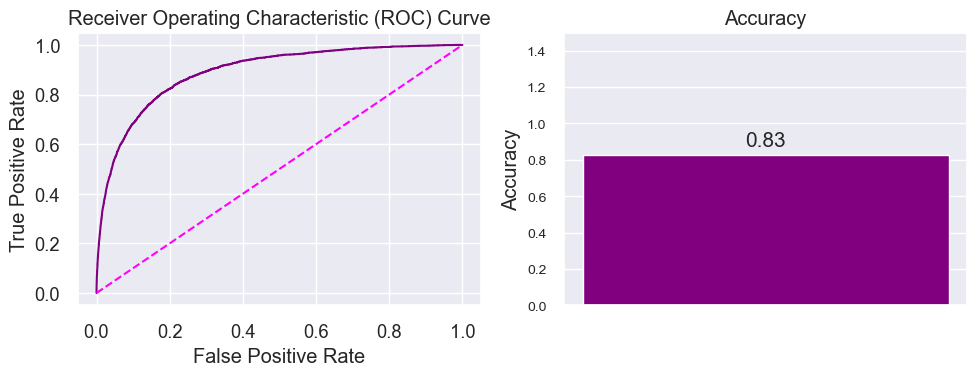

              precision    recall  f1-score   support

           0       1.00      0.83      0.90    202133
           1       0.06      0.80      0.11      2878

    accuracy                           0.83    205011
   macro avg       0.53      0.81      0.51    205011
weighted avg       0.98      0.83      0.89    205011

CPU times: total: 4min 39s
Wall time: 22min 38s


In [65]:
%%time
experiment.train(xgb_classifier,param_grid=param_grid,search_type='random')

In [66]:
# the classification report after using the best threshold
y_pred=experiment.best.predict_proba(X_test)[:,1]


In [67]:
y_pred_new_threshold = np.where(y_pred >= 0.77, 1, 0)

In [68]:
print(classification_report(y_test,y_pred_new_threshold))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97    202133
           1       0.13      0.55      0.21      2878

    accuracy                           0.94    205011
   macro avg       0.56      0.75      0.59    205011
weighted avg       0.98      0.94      0.96    205011



In [69]:
print(confusion_matrix(y_test,y_pred_new_threshold))

[[191911  10222]
 [  1306   1572]]


In [71]:
saved_model_path = experiment.save_model('models/XGboost_after_tuning.pkl')
print("Model saved at:", saved_model_path)

Model saved at: models/XGboost_after_tuning.pkl


## final comment
- as we can see the trade off between the predictive equality and the accuracy is high this is because we suffer from class imbalance problem.
- as we after using the 0.77 as new threshold, leads to many false positive (non fraud to be detected as fraud).
- so yes the model is fair but it is failed in the main purpose which is detecting the fraud and non fraud requests.